<a href="https://colab.research.google.com/github/AymenBensaifia/AymenBensaifia/blob/main/Aymen_Bensaifia_NN_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [316]:
#imoport some imoport libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import warnings
import folium
from folium.plugins import HeatMap
import missingno as msno
import plotly.express as px
plt.style.use('fivethirtyeight')
%matplotlib inline

#1. problem definition#
Hotel Booking as classification topic. (Cancelled or Not) by using ANN
in another way , Predict whether a hotel booking will be canceled based on various features related to the booking.




#2. Data Understanding#

**Hotel Type**: Resort Hotel or City Hotel

**Lead Time**: Number of days between booking and arrival

**Arrival Date**: Year, month, week number, and day of the month

**Stays**: Number of weekend and weeknights booked

**Guests:** Number of adults, children, and babies

**Meal Plan**: Type of meal plan booked

**Country**: Country of origin of the guest
Market Segment: How the booking was made (e.g., travel agents, tour operators)

**Distribution Channel**: Channel through which the booking was made

**Repeated Guest**: Whether the guest is a returning customer

**Previous Cancellations**: Number of past cancellations by the guest

**Previous Bookings Not Canceled**: Number of past bookings not canceled by the guest

**Room Type Reserved vs Assigned:** Comparison of reserved and assigned room types

**Booking Changes**: Number of changes made to the booking

**Deposit Type**: Type of deposit (no deposit, non-refundable, refundable)

**Agent**: ID of the travel agency

**Company**: ID of the company responsible for booking

**Days in Waiting List**: Number of days the booking was on the waiting list

**Customer Type**: Group, transient, or transient-party booking

**ADR (Average Daily Rate)**: Average daily rate for the booking

**Car Parking Spaces**: Number of parking spaces required

**Special Requests:** Number of special requests made by the guest

**Reservation Status**: Final status of the booking (check-out, no-show, canceled)

**Reservation Status Date**: Date of the last status update

In [389]:
# load the data directly
data=pd.read_csv('/content/hotel_bookings.csv')

In [318]:
# or dirrectly From my drive
#from google.colab import drive
#drive.mount('/content/drive')

In [319]:
 #data.to_excel('data.xlsx', index=False)     #if i want read my data wit excel (for better visualisation)


#2. EDA

##stracture of data

In [320]:
#to display all th columns of my data
pd.set_option('display.max_columns',32)

In [321]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [402]:
data.shape

(119390, 32)

In [403]:
#calculates the num of unique values in each column of the dataframe.
data.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

##1. What is the overall cancellation rate?
the qst is : What proportion of bookings are canceled?

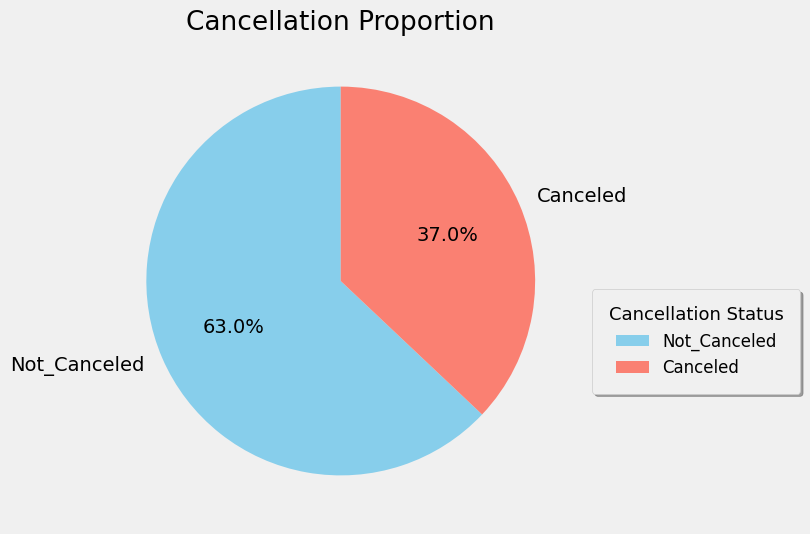

In [324]:
# Calculate cancellation counts
canc_counts = data['is_canceled'].value_counts()
my_labels = ['Not_Canceled','Canceled']
plt.figure(figsize=(8, 6))
plt.pie(canc_counts, labels=my_labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Cancellation Proportion', fontsize=19, fontweight='medium', color='black')
plt.legend(my_labels, title="Cancellation Status",loc="upper left", bbox_to_anchor=(1, 0.5)
            ,fontsize=12, title_fontsize='13',frameon=True,shadow=True,borderpad=1)
plt.show()

**crosstab** :Compute a simple cross tabulation of two (or more) factors.
By default, computes a frequency table of the factors unless an
array of values and an aggregation function are passed.

**Analysis of Reserved and Assigned Room Types**
The visualization compares the reserved room types with the assigned room types in the hotel reservations dataset. Each cell in the heatmap represents the count of reservations where a room of a specific type was reserved and another room of a different type was assigned.

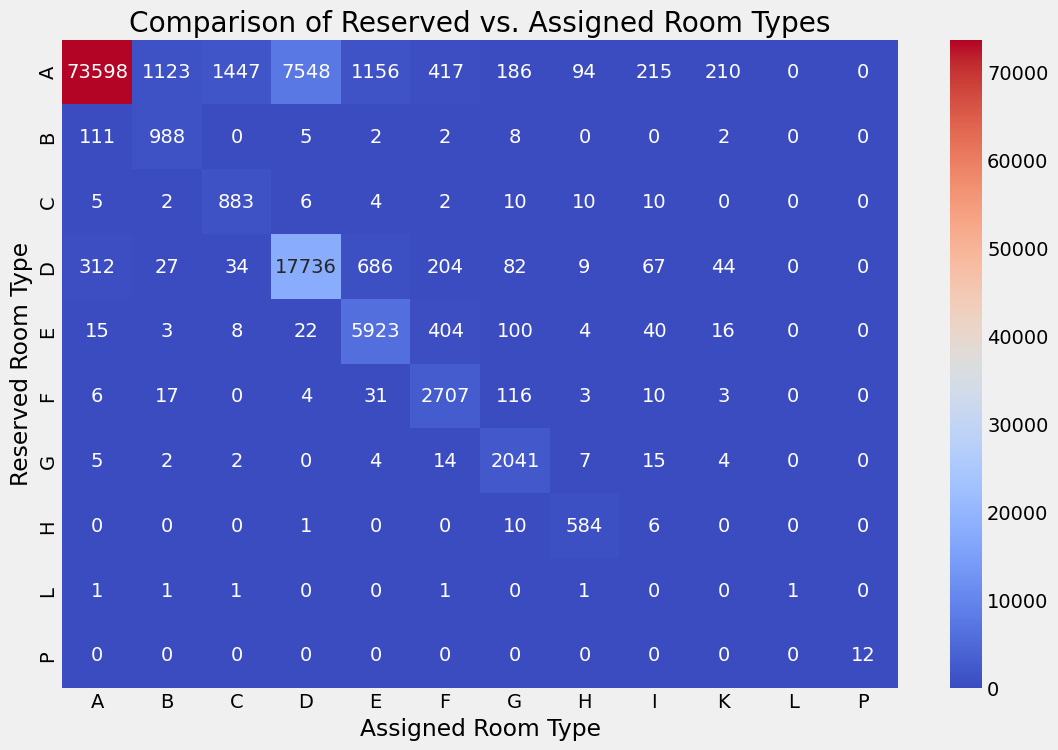

In [325]:
# Create a crosstab of reserved and assigned room types
room_type_comparison = pd.crosstab(data['reserved_room_type'], data['assigned_room_type'])
# Plot
plt.figure(figsize=(12, 8))
sns.heatmap(room_type_comparison, annot=True, fmt='d', cmap='coolwarm')
plt.title('Comparison of Reserved vs. Assigned Room Types')
plt.ylabel('Reserved Room Type')
plt.xlabel('Assigned Room Type')
plt.show()

##2. How does the lead time affect cancellation rates?
qst: Is there a relationship between the lead time and the likelihood of a booking being canceled?



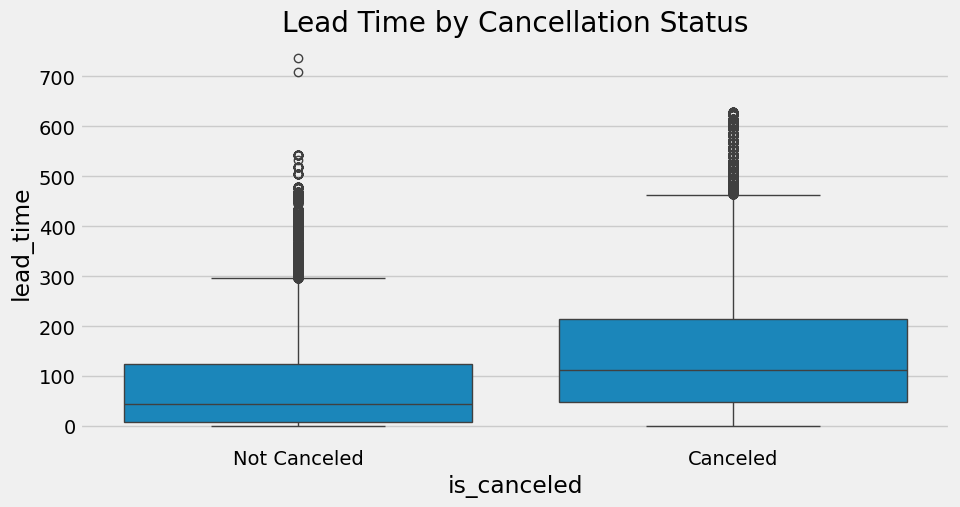

In [326]:
#box plot :
plt.figure(figsize=(10, 5))
sns.boxplot(x='is_canceled', y='lead_time', data=data)
plt.title('Lead Time by Cancellation Status')
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])
plt.show()

##3. What are the booking trends over time?
qst : How do bookings vary by month and year?

In [327]:
monthly_bookings = data.groupby(['arrival_date_year', 'arrival_date_month']).size().unstack()
monthly_bookings

arrival_date_month,April,August,December,February,January,July,June,March,May,November,October,September
arrival_date_year,,,,,,,,,,,,
2015,NaN,3889.0,2920.0,NaN,NaN,2776.0,NaN,NaN,NaN,2340.0,4957.0,5114.0
2016,5428.0,5063.0,3860.0,3891.0,2248.0,4572.0,5292.0,4824.0,5478.0,4454.0,6203.0,5394.0
2017,5661.0,4925.0,NaN,4177.0,3681.0,5313.0,5647.0,4970.0,6313.0,NaN,NaN,NaN


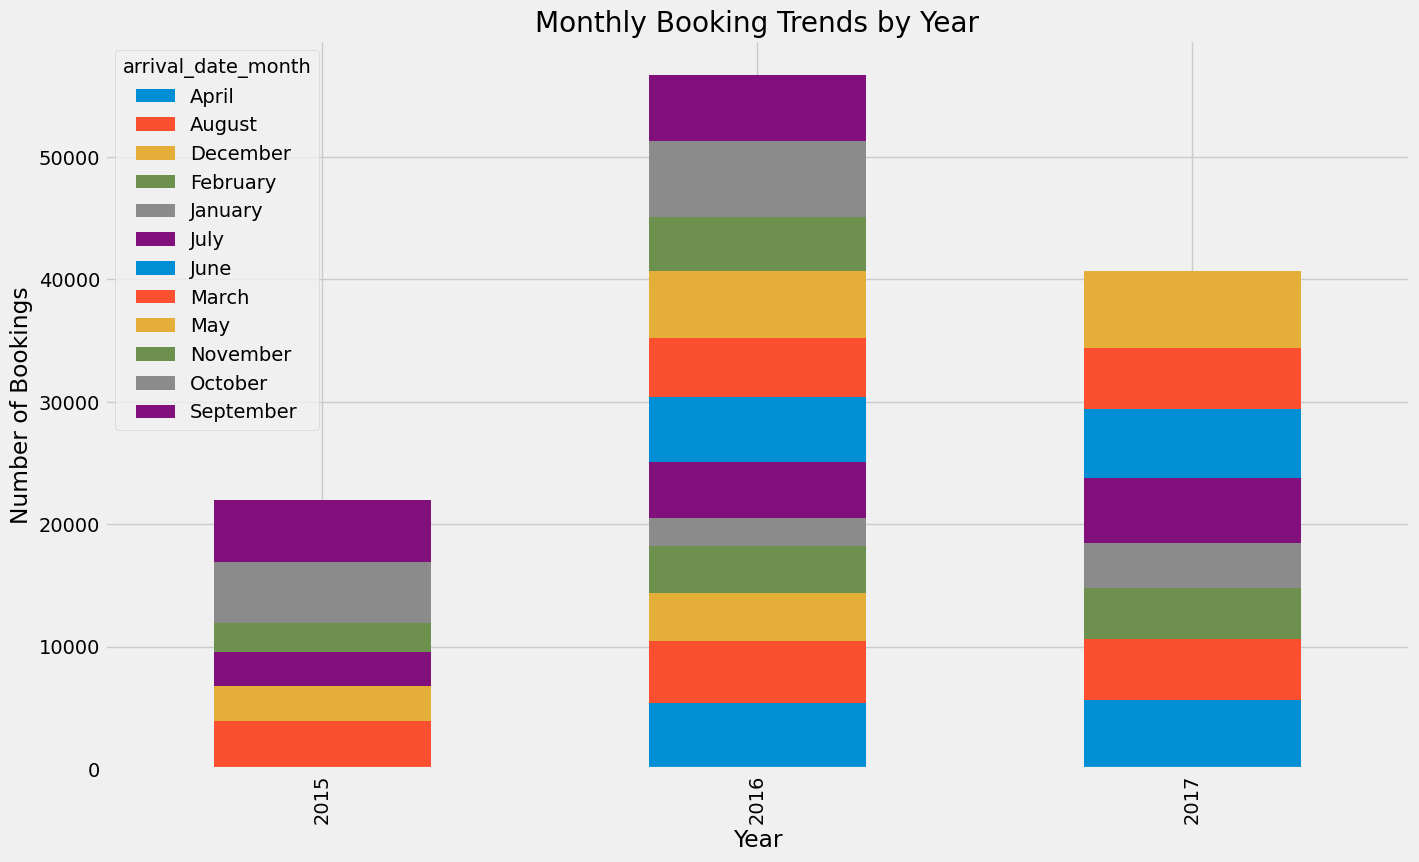

In [328]:
monthly_bookings.plot(kind='bar', stacked=True, figsize=(15, 9))
plt.title('Monthly Booking Trends by Year')
plt.ylabel('Number of Bookings')
plt.xlabel('Year')
plt.show()
#kind: Literal['line', 'bar', 'barh', 'hist', 'box', 'kde', 'density', 'area', 'pie', 'scatter', 'hexbin']


##4. Which market segments have the highest cancellation rates?
qst: r there differences in cancellation rates across market segments?

In [329]:
data['market_segment'].value_counts()

market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: count, dtype: int64

In [330]:
cancellation_by_segment = data.groupby('market_segment')['is_canceled'].mean()
cancellation_by_segment

market_segment
Aviation         0.219409
Complementary    0.130552
Corporate        0.187347
Direct           0.153419
Groups           0.610620
Offline TA/TO    0.343160
Online TA        0.367211
Undefined        1.000000
Name: is_canceled, dtype: float64

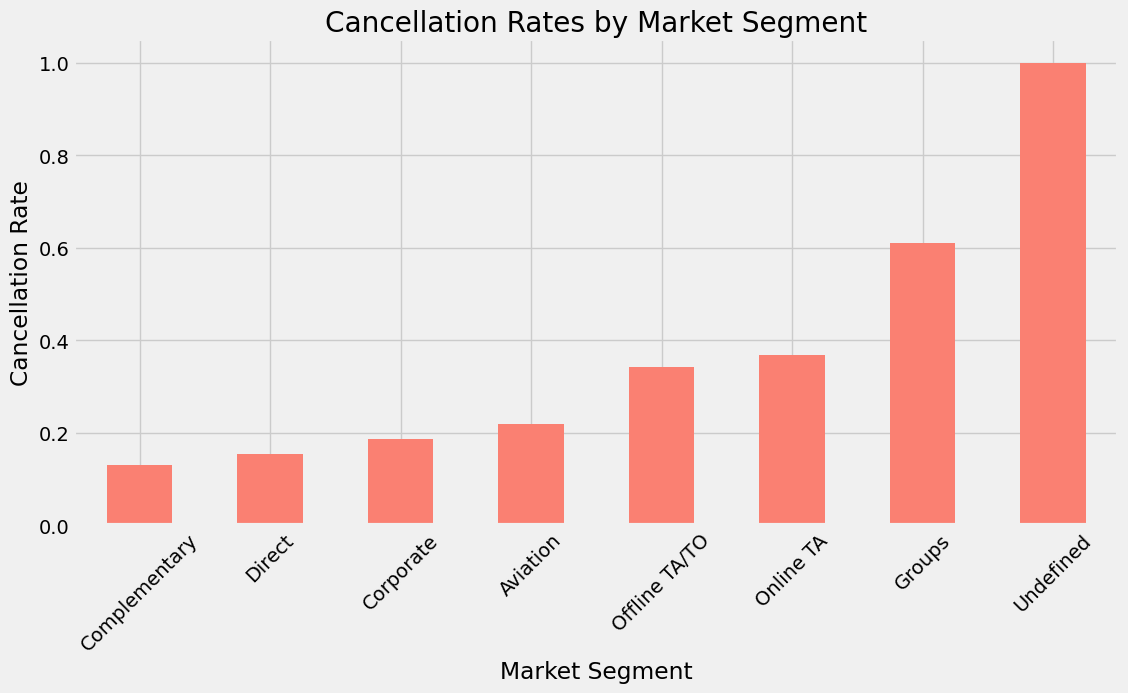

In [331]:
cancellation_by_segment = cancellation_by_segment.sort_values(ascending=True)
plt.figure(figsize=(12, 6))
cancellation_by_segment.plot(kind='bar', color='salmon')
plt.title('Cancellation Rates by Market Segment')
plt.ylabel('Cancellation Rate')
plt.xlabel('Market Segment')
plt.xticks(rotation=45)
plt.show()

**High Cancellation Rates:**Groups,Online TA (Travel Agencies) ,Offline TA/TO (Travel Agencies/Tour Operators)

**Moderate Cancellation Rates:**Aviation ,Corporate ,Direct

**Low Cancellation Rates** Complementary



In [388]:
# type of variables and sum :
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
print(f'Number of categorical variables: {len(categorical_cols)}')
print(f'Number of numerical variables: {len(numerical_cols)}')

Number of categorical variables: 11
Number of numerical variables: 20


In [335]:
data['hotel'].value_counts()

hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64

In [336]:
#check my data
def check_data(dataframe, head=5):
    print(" SHAPE ".center(70, '-'))
    print('Rows: {}'.format(dataframe.shape[0]))
    print('Columns: {}'.format(dataframe.shape[1]))

    print(" TYPES ".center(70, '-'))
    print(dataframe.dtypes)

    print(" HEAD ".center(70, '-'))
    print(dataframe.head(head))

    print(" TAIL ".center(70, '-'))
    print(dataframe.tail(head))

    print(" MISSING VALUES ".center(70, '-'))
    print(dataframe.isnull().sum())

    print(" DUPLICATED VALUES ".center(70, '-'))
    print(dataframe.duplicated().sum())

    print(" QUANTILES ".center(70, '-'))
    # Sélectionner uniquement les colonnes numériques
    numeric_df = dataframe.select_dtypes(include=['number'])
    if not numeric_df.empty:
        print(numeric_df.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
    else:
        print("No numeric columns to display quantiles.")

# Appeler la fonction pour vérifier les données
check_data(data)

------------------------------- SHAPE --------------------------------
Rows: 119390
Columns: 32
------------------------------- TYPES --------------------------------
hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 

In [337]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


##content of variables
some variables (not all)

In [338]:
data["hotel"].value_counts()
#we have non balanced data(79330 vs 40060)

hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64

In [339]:
data['is_canceled'].value_counts()

is_canceled
0    75166
1    44224
Name: count, dtype: int64

In [340]:
#we can directly apply a Function to return value counts for all the categorical_variables
def get_categorical_value_counts(df):
    categorical_cols = data.select_dtypes(include=['object']).columns
    value_counts = {col: data[col].value_counts() for col in categorical_cols}
    return value_counts
# Get value counts for all categorical variables
categorical_value_counts = get_categorical_value_counts(data)
# Display the value counts for each categorical variable
for col, counts in categorical_value_counts.items():
    print(f'Value counts for {col}:\n{counts}\n')

Value counts for hotel:
hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64

Value counts for arrival_date_month:
arrival_date_month
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: count, dtype: int64

Value counts for meal:
meal
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: count, dtype: int64

Value counts for country:
country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: count, Length: 177, dtype: int64

Value counts for market_segment:
market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined   

##analyse_univarie


###categoriel variables
just some important variables

In [341]:
data.describe(include=['object'])

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


####hotel variable

In [344]:
data['hotel'].value_counts()

hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64

In [345]:
hotel_counts_series = data['hotel'].value_counts()
hotel_counts_series
# Convert the Series to a DataFrame
data_hotel_counts = pd.DataFrame({'hotel': hotel_counts_series.index, 'Count': hotel_counts_series.values})
data_hotel_counts['percentage'] = data_hotel_counts['Count']/(79330+40060)
# Display the DataFrame
print(data_hotel_counts)

# commentaire :
#The distribution shows a clear preference for City Hotel bookings over Resort Hotel bookings with a roughly 2:1 ratio.

          hotel  Count  percentage
0    City Hotel  79330    0.664461
1  Resort Hotel  40060    0.335539


<ipython-input-346-1981b38d3ba3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data_hotel_counts['hotel'] , y=data_hotel_counts['Count'] ,palette='viridis')


Text(0.5, 1.0, 'hotels counts')

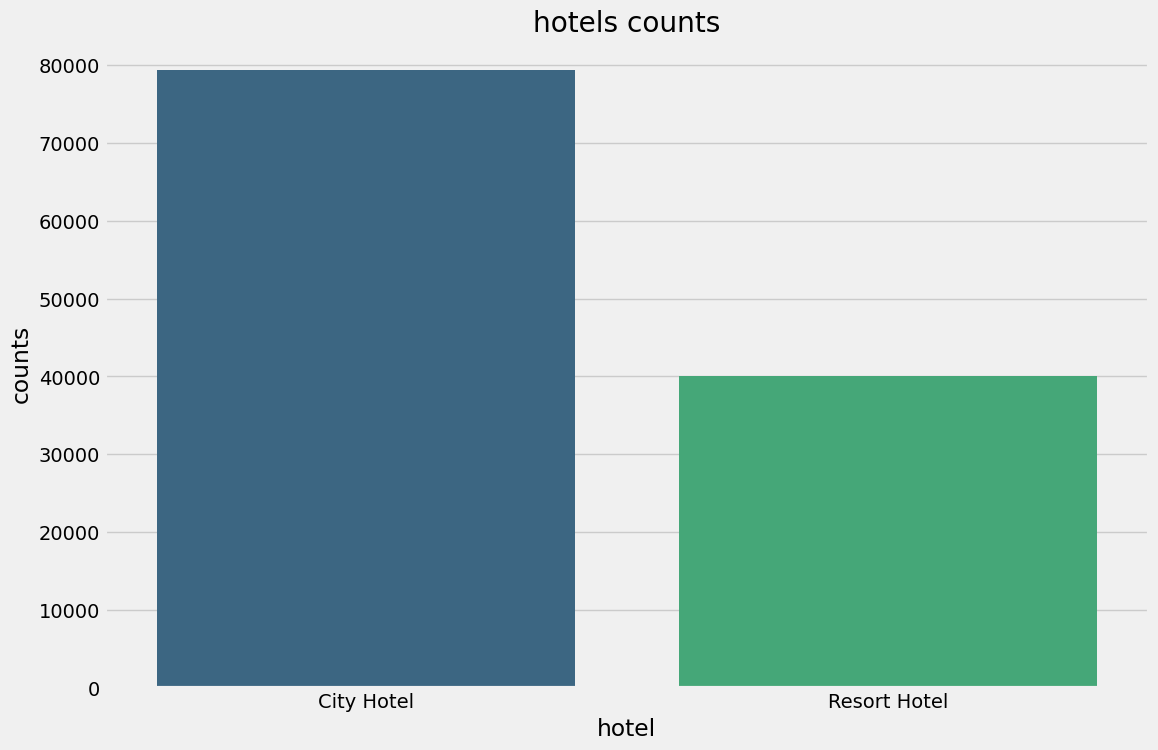

In [346]:
plt.figure(figsize=(12,8))
sns.barplot(x=data_hotel_counts['hotel'] , y=data_hotel_counts['Count'] ,palette='viridis')
plt.xlabel("hotel")
plt.ylabel("counts")
plt.title("hotels counts")


####country variable

In [347]:
country_counts = data['country'].value_counts()
country_counts

country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: count, Length: 177, dtype: int64

In [348]:
country_counts_series = data['country'].value_counts()
country_counts_series
# Convert the Series to a DataFrame
data_country_counts = pd.DataFrame({'country': country_counts_series.index, 'Count': country_counts_series.values})
data_country_counts['percentage'] = data_country_counts['Count']/(75166+44224)
# Display the DataFrame
print(data_country_counts)

    country  Count  percentage
0       PRT  48590    0.406986
1       GBR  12129    0.101591
2       FRA  10415    0.087235
3       ESP   8568    0.071765
4       DEU   7287    0.061035
..      ...    ...         ...
172     DJI      1    0.000008
173     BWA      1    0.000008
174     HND      1    0.000008
175     VGB      1    0.000008
176     NAM      1    0.000008

[177 rows x 3 columns]


####generate a function for all the categorical variables.

In [349]:
#or create a Fun to generate descriptive statistics for all the categorical variables.
def describe_categorical(df):
    categorical_cols = data.select_dtypes(include=['object']).columns
    descriptive_stats = data[categorical_cols].describe(include=['object'])
    return descriptive_stats
# Generate descriptive statistics for categorical variables
categorical_descriptive_stats = describe_categorical(data)
# Display the descriptive statistics
print(categorical_descriptive_stats)

             hotel arrival_date_month    meal country market_segment  \
count       119390             119390  119390  118902         119390   
unique           2                 12       5     177              8   
top     City Hotel             August      BB     PRT      Online TA   
freq         79330              13877   92310   48590          56477   

       distribution_channel reserved_room_type assigned_room_type  \
count                119390             119390             119390   
unique                    5                 10                 12   
top                   TA/TO                  A                  A   
freq                  97870              85994              74053   

       deposit_type customer_type reservation_status reservation_status_date  
count        119390        119390             119390                  119390  
unique            3             4                  3                     926  
top      No Deposit     Transient          Check-Out    

<ipython-input-350-6c505012a2e1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Count', data=value_counts, palette='viridis')


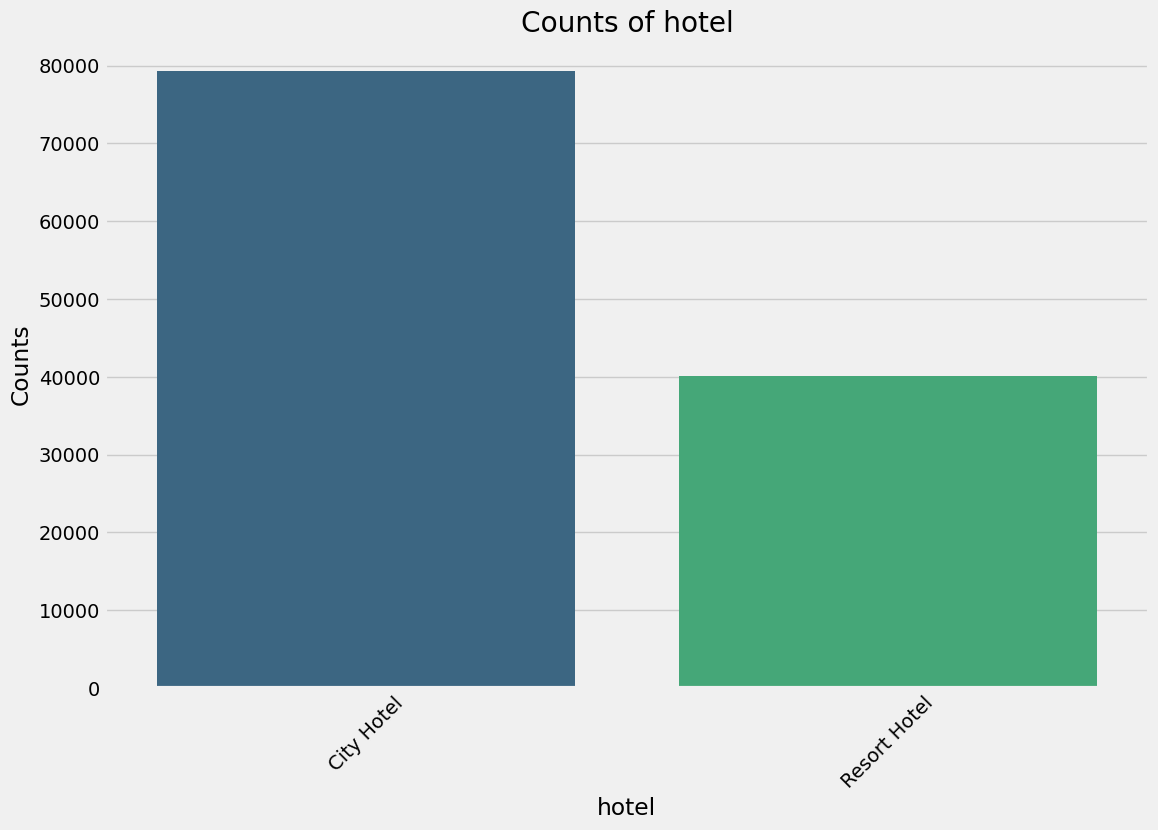

<ipython-input-350-6c505012a2e1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Count', data=value_counts, palette='viridis')


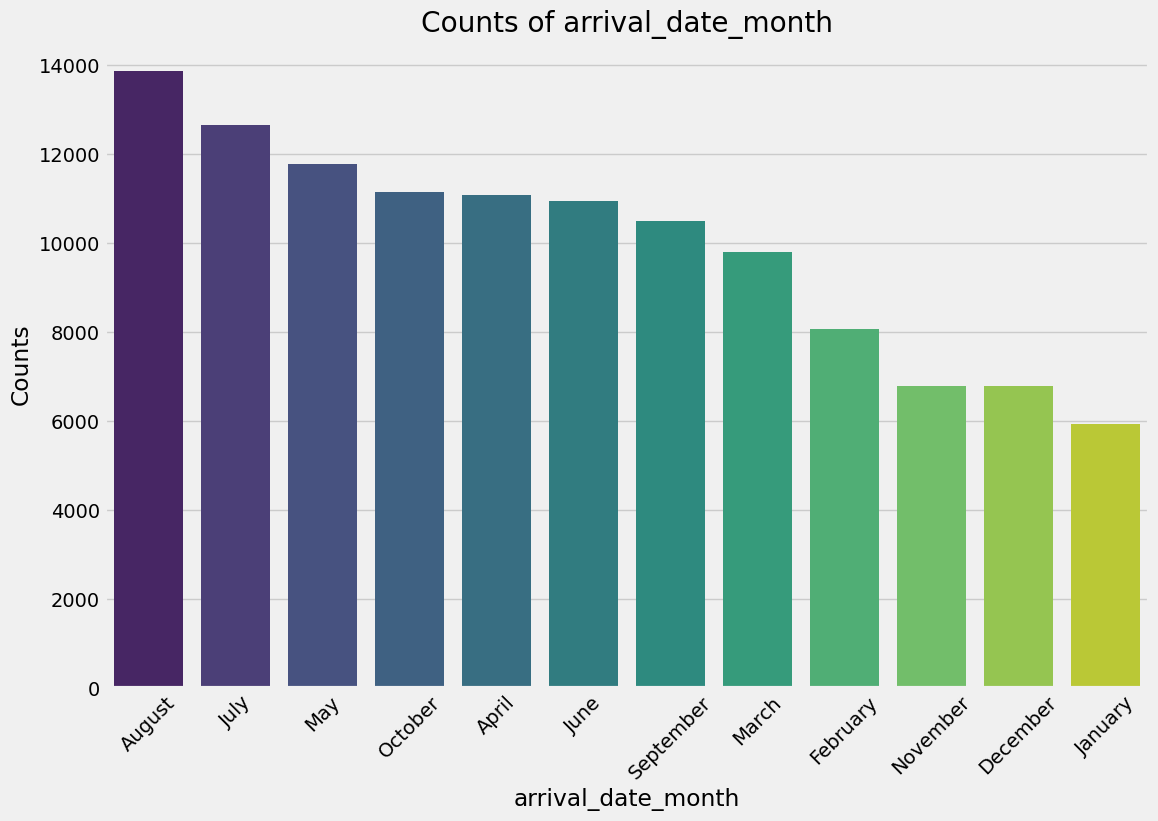

<ipython-input-350-6c505012a2e1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Count', data=value_counts, palette='viridis')


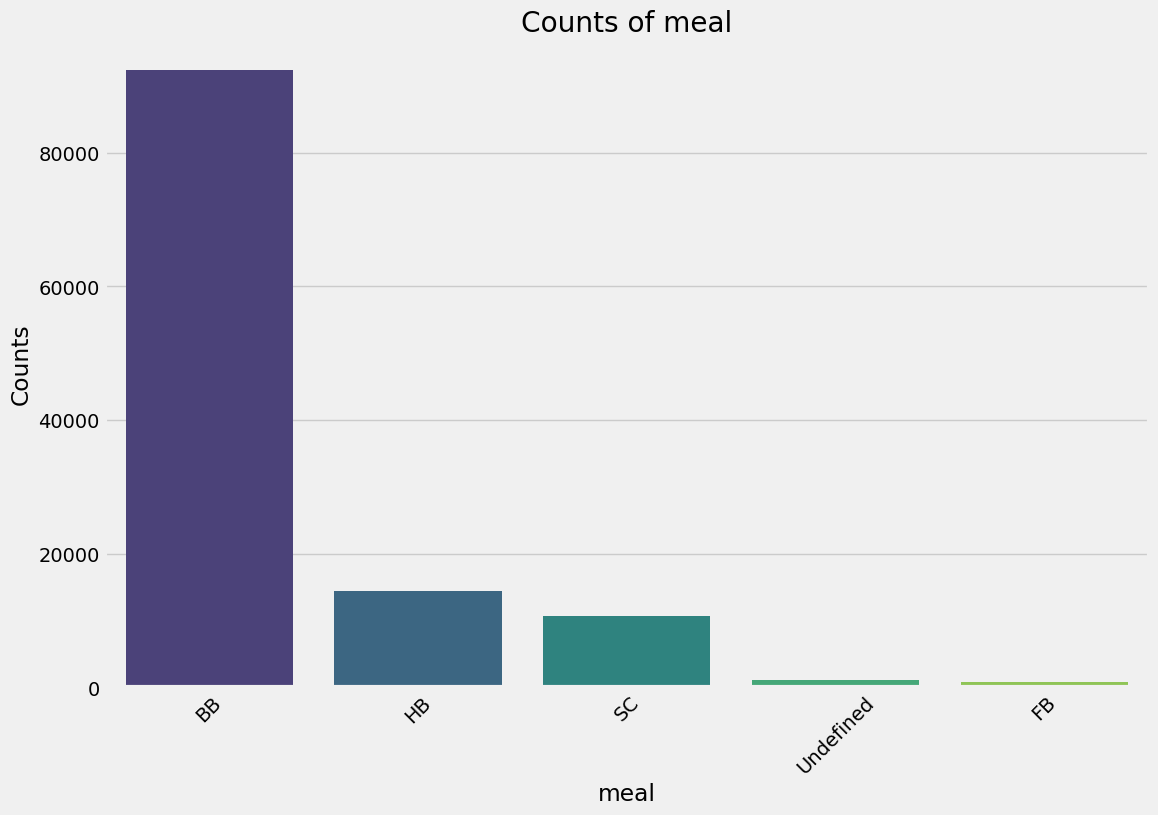

<ipython-input-350-6c505012a2e1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Count', data=value_counts, palette='viridis')


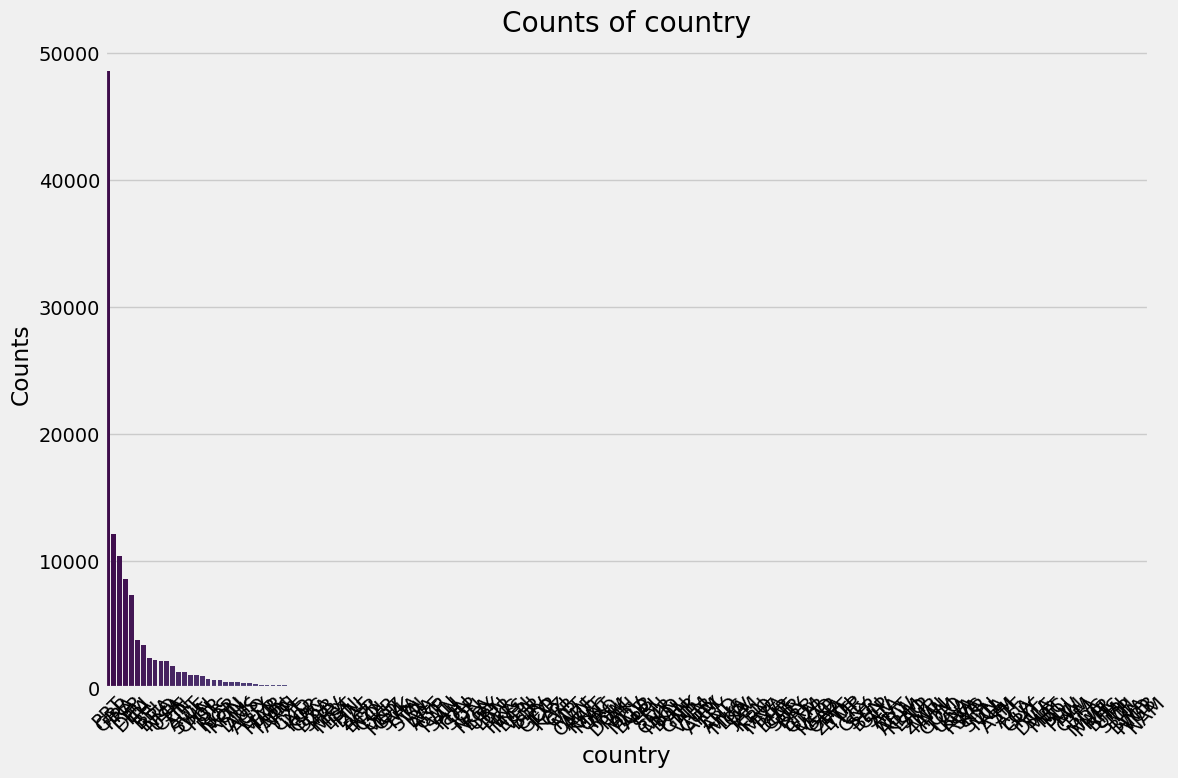

<ipython-input-350-6c505012a2e1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Count', data=value_counts, palette='viridis')


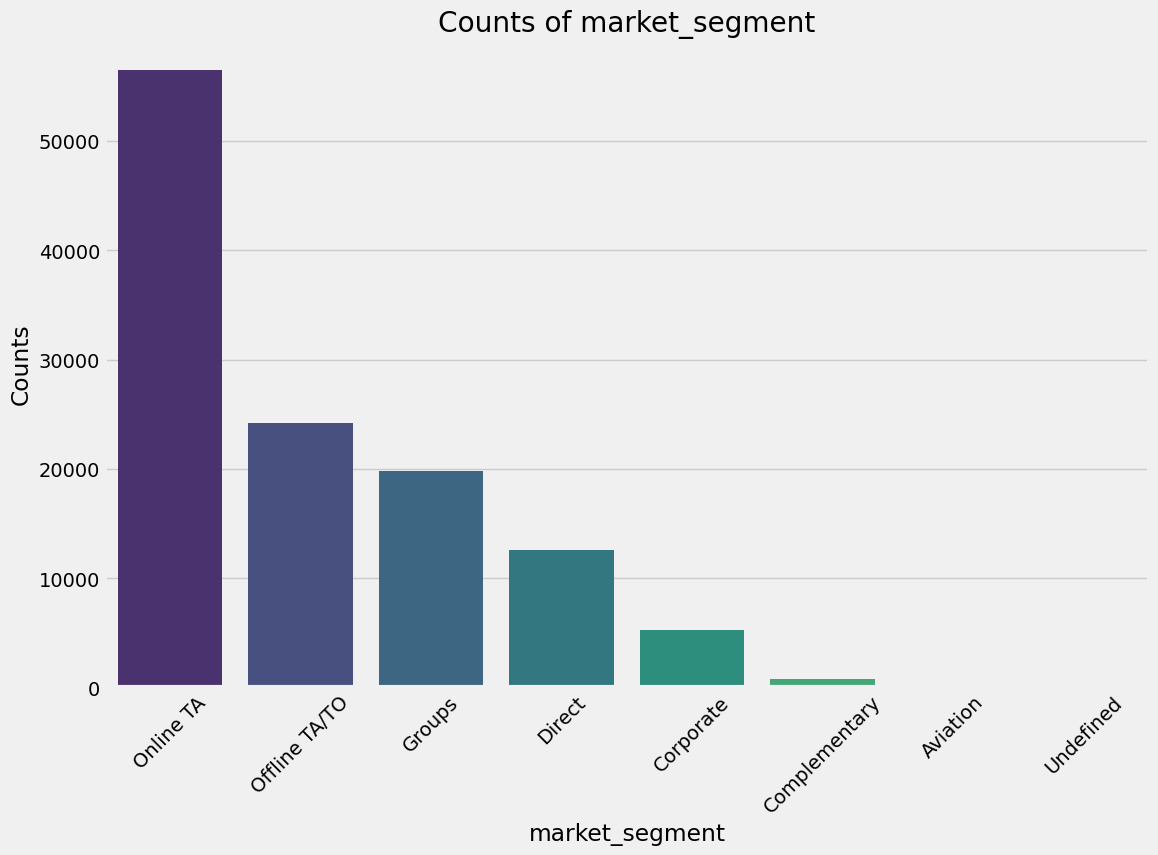

<ipython-input-350-6c505012a2e1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Count', data=value_counts, palette='viridis')


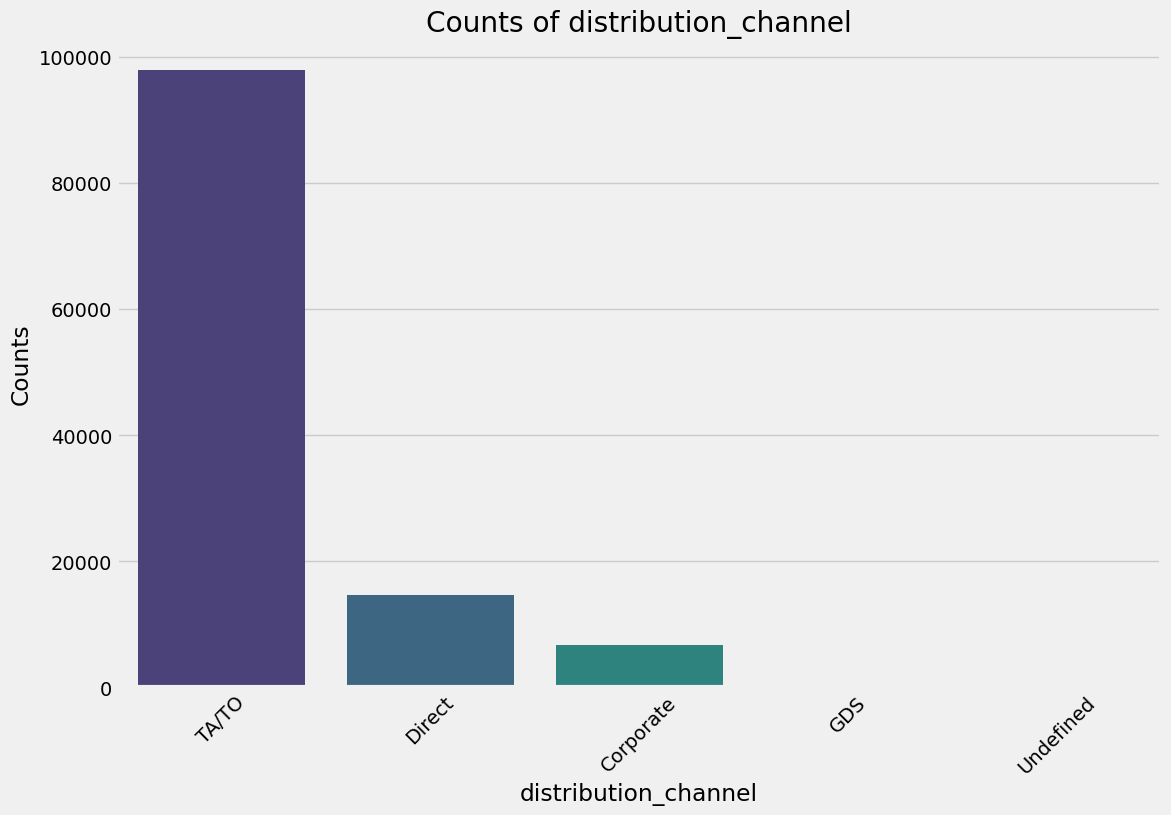

<ipython-input-350-6c505012a2e1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Count', data=value_counts, palette='viridis')


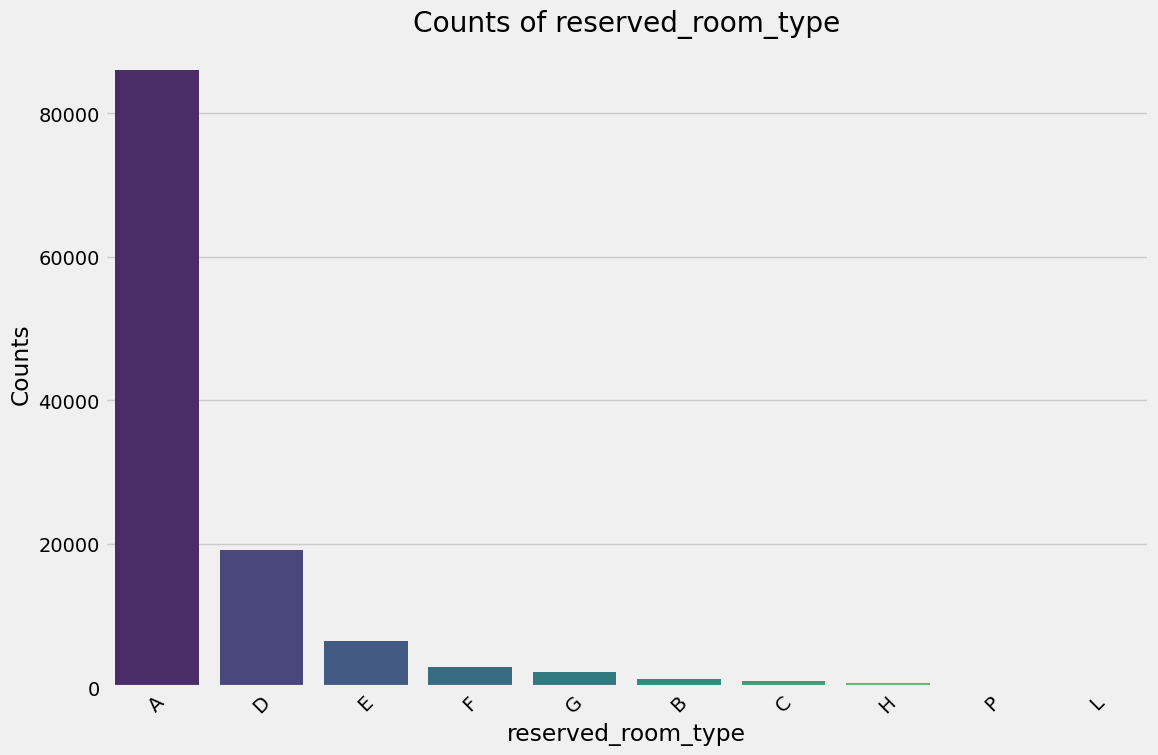

<ipython-input-350-6c505012a2e1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Count', data=value_counts, palette='viridis')


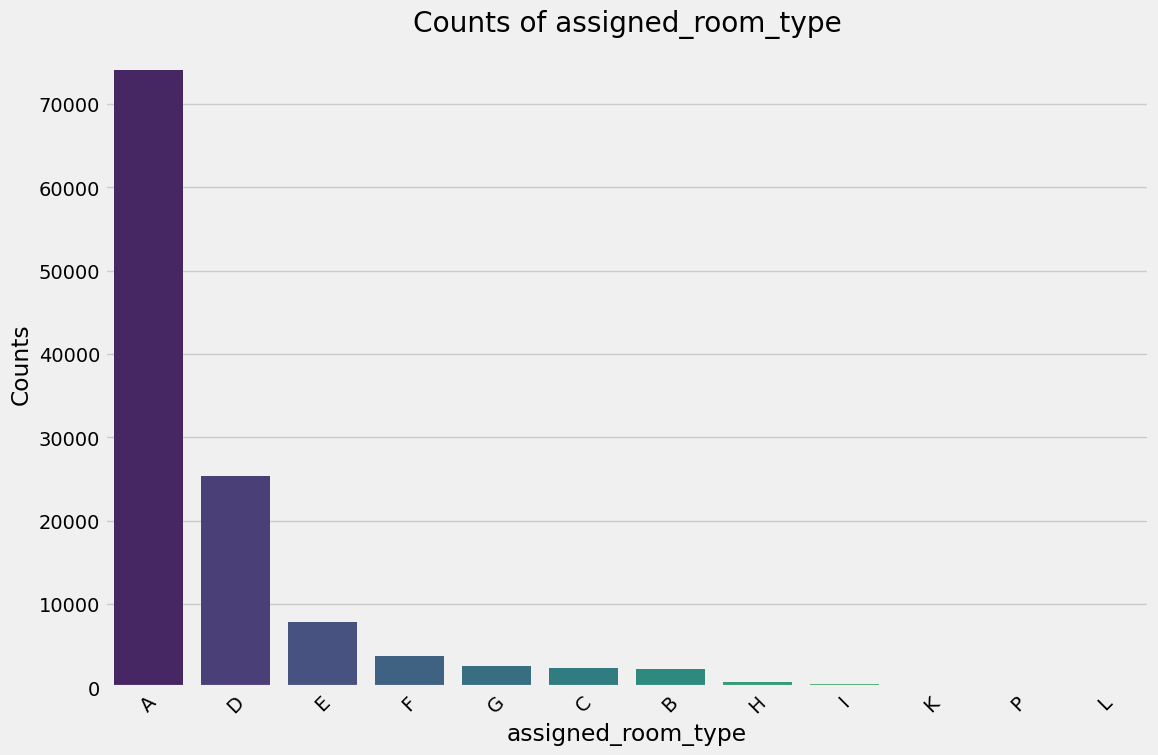

<ipython-input-350-6c505012a2e1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Count', data=value_counts, palette='viridis')


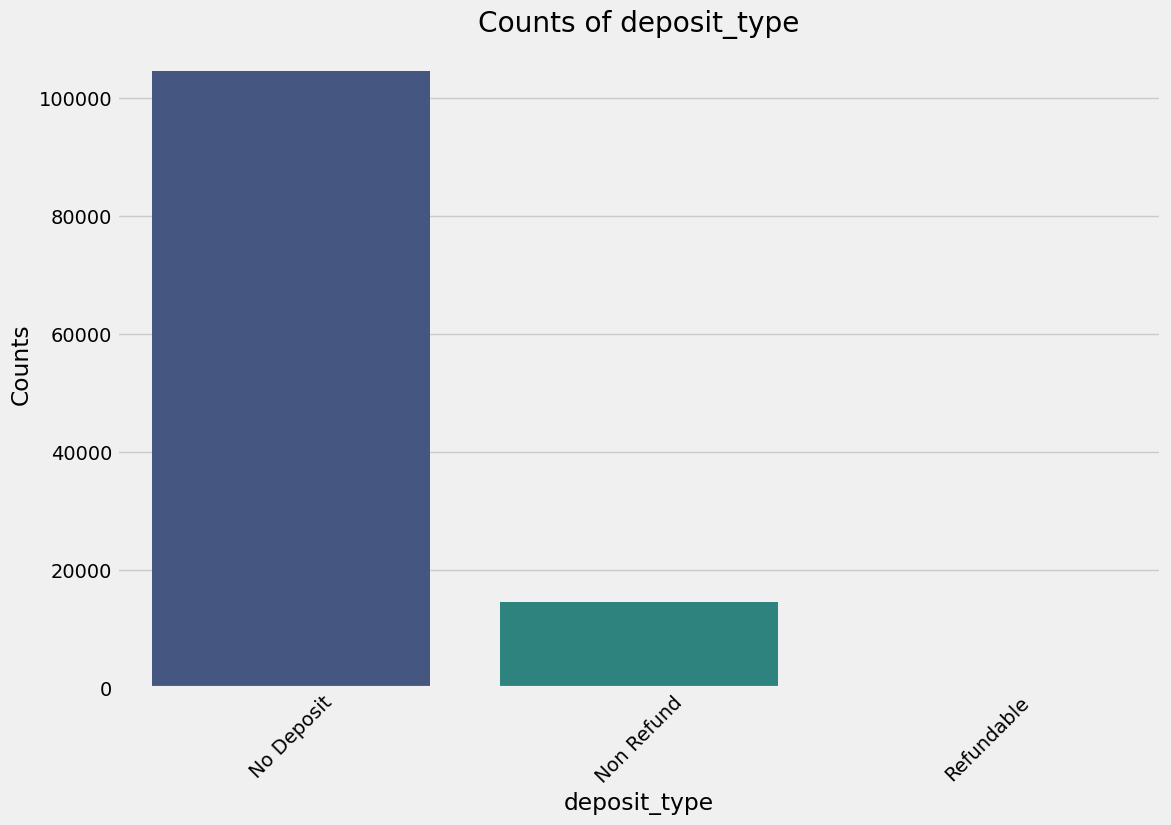

<ipython-input-350-6c505012a2e1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Count', data=value_counts, palette='viridis')


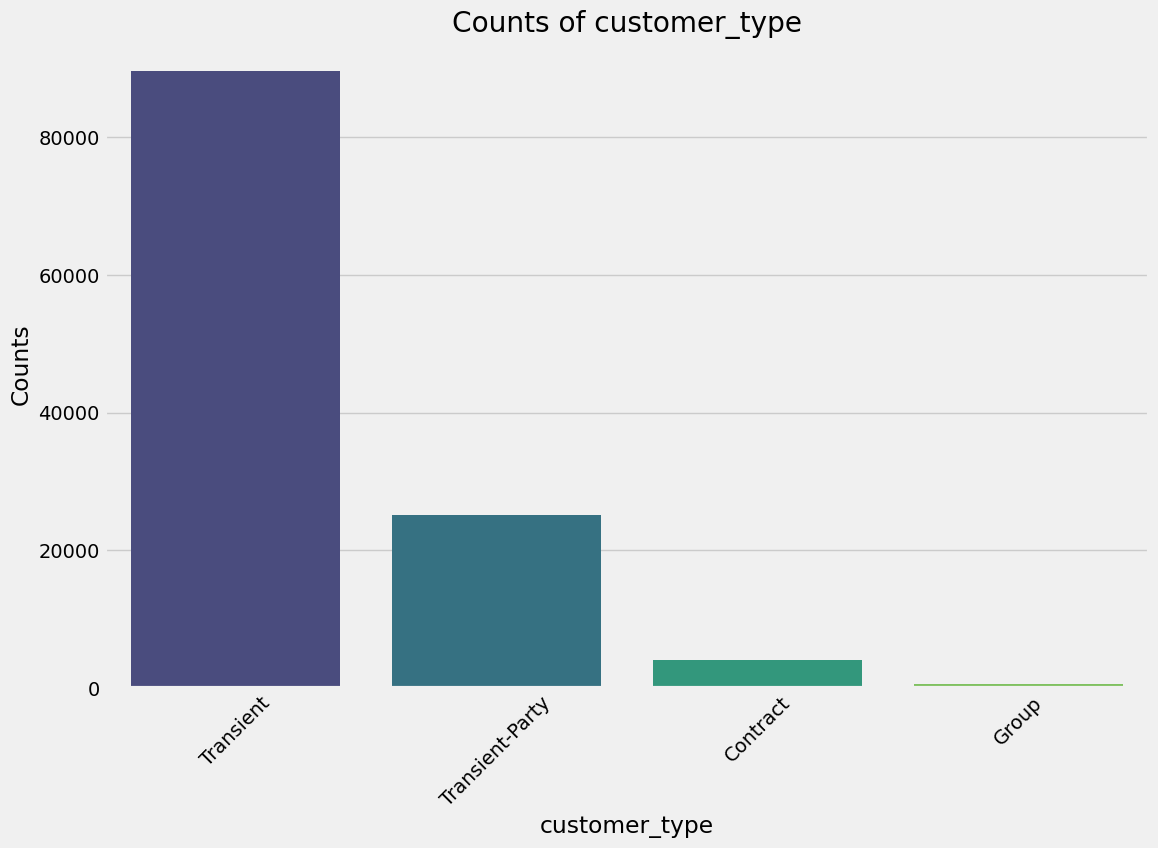

<ipython-input-350-6c505012a2e1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Count', data=value_counts, palette='viridis')


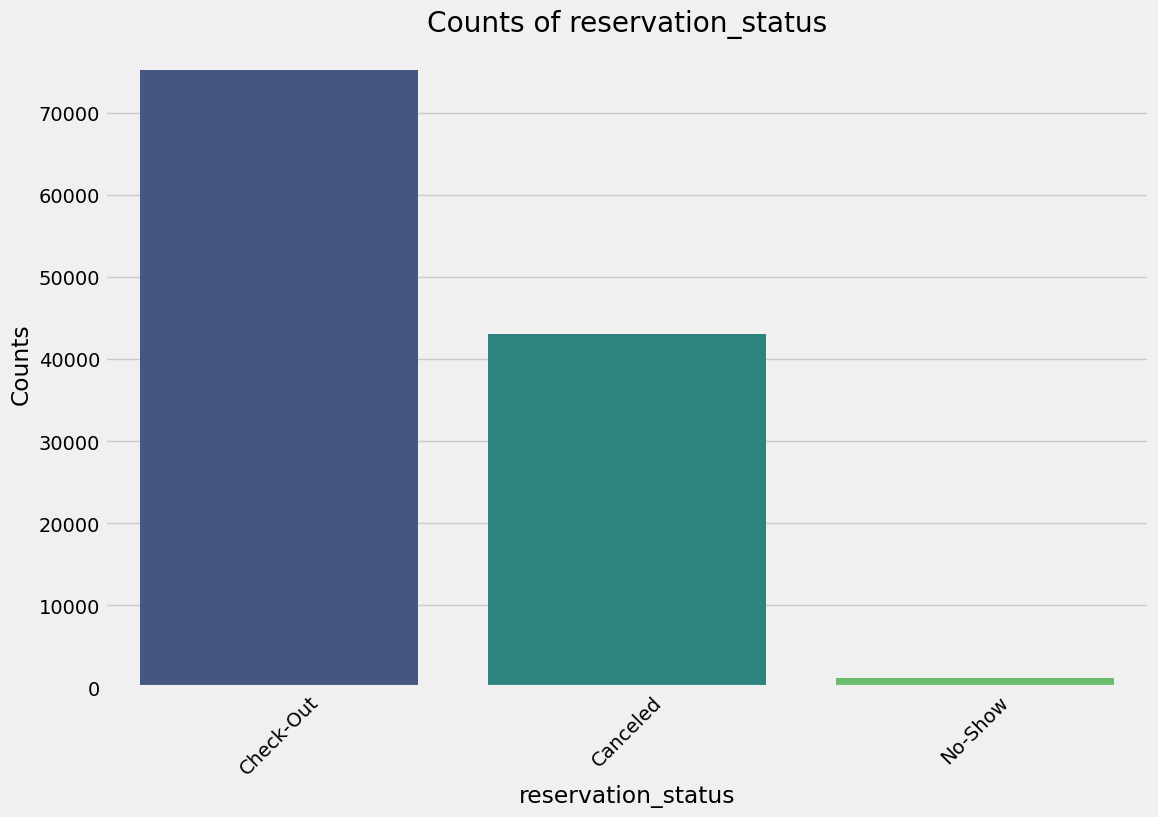

<ipython-input-350-6c505012a2e1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Count', data=value_counts, palette='viridis')


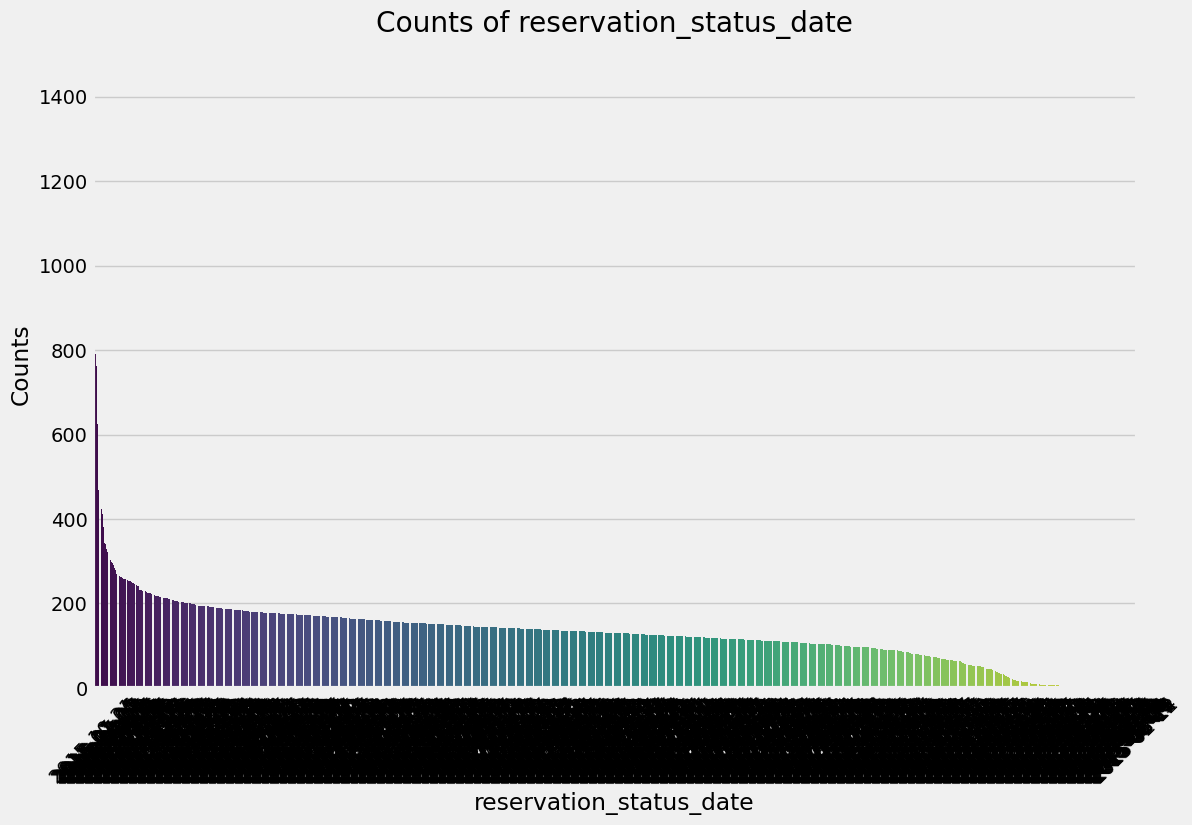

In [350]:
# plot all the categorical variables.
def plot_categorical_distributions(data):
    categorical_cols = data.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        plt.figure(figsize=(12, 8))
        value_counts = data[col].value_counts().reset_index()
        value_counts.columns = [col, 'Count']
        sns.barplot(x=col, y='Count', data=value_counts, palette='viridis')
        plt.xlabel(col)
        plt.ylabel('Counts')
        plt.title(f'Counts of {col}')
        plt.xticks(rotation=45)
        plt.show()

# Generate bar plots for all categorical variables
plot_categorical_distributions(data)

###numerical variables

In [351]:
num_var = data.select_dtypes(include=['int64', 'float64'])
num_var.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,NaN,NaN,0,0.0,0,0
1,0,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,NaN,NaN,0,0.0,0,0
2,0,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,NaN,NaN,0,75.0,0,0
3,0,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,304.0,NaN,0,75.0,0,0
4,0,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,240.0,NaN,0,98.0,0,1


####is_canceled variable

In [397]:
value_counts_series = data['is_canceled'].value_counts()
value_counts_series
# Convert the Series to a DataFrame
data_value_counts = pd.DataFrame({'is_canceled': value_counts_series.index, 'Count': value_counts_series.values})
data_value_counts['percentage'] = data_value_counts['Count']/(75166+44224)
# Display the DataFrame
print(data_value_counts)


   is_canceled  Count  percentage
0            0  75166    0.629584
1            1  44224    0.370416


<ipython-input-398-b3ae777600c6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data_value_counts['is_canceled'] , y=data_value_counts['Count'] ,palette='viridis')


Text(0.5, 1.0, 'cancelation counts')

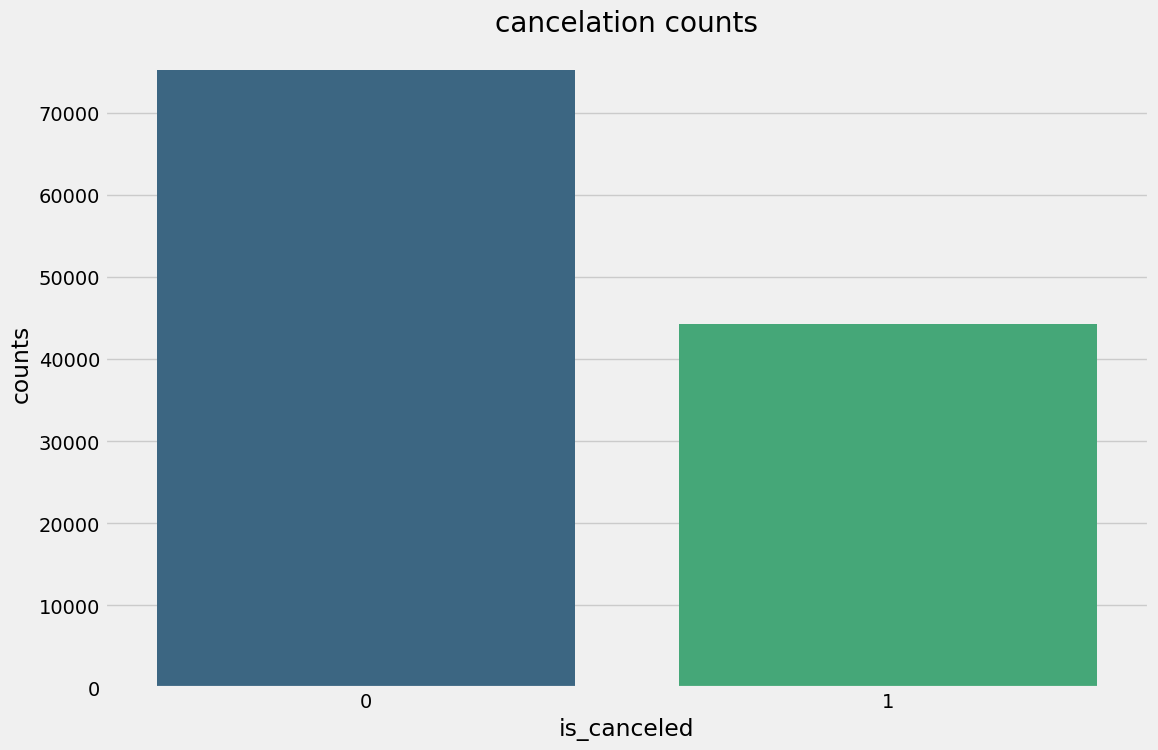

In [398]:
#plot
plt.figure(figsize=(12,8))
sns.barplot(x=data_value_counts['is_canceled'] , y=data_value_counts['Count'] ,palette='viridis')
plt.xlabel("is_canceled")
plt.ylabel("counts")
plt.title("cancelation counts")

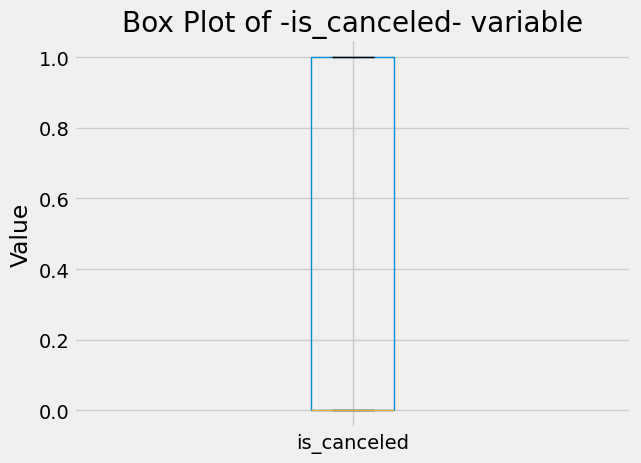

In [352]:
data.boxplot(column='is_canceled')
plt.title('Box Plot of -is_canceled- variable')
plt.ylabel('Value')
plt.show()

####lead_time variable

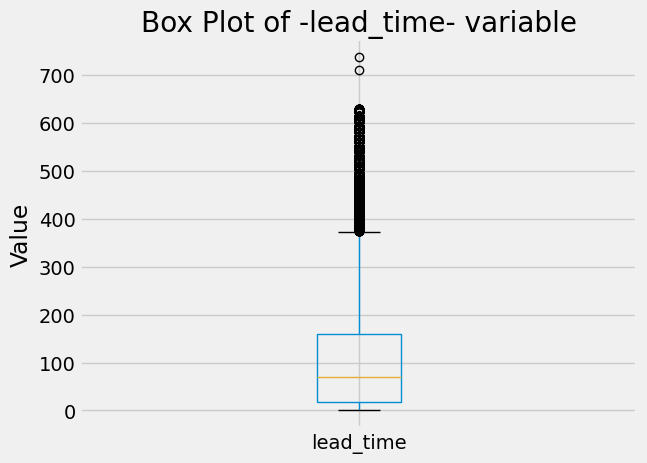

In [353]:
data.boxplot(column='lead_time')
plt.title('Box Plot of -lead_time- variable')
plt.ylabel('Value')
plt.show()

In [354]:
#generate descriptive statistics for all the numerical variables(using Function)
def describe_numerical(data):
    numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
    descriptive_stats = data[numerical_cols].describe()
    return descriptive_stats
#Generate for them
numerical_descriptive_stats = describe_numerical(data)
#Display them
print(numerical_descriptive_stats)

         is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000            

##analyse_multy


<Axes: xlabel='hotel', ylabel='count'>

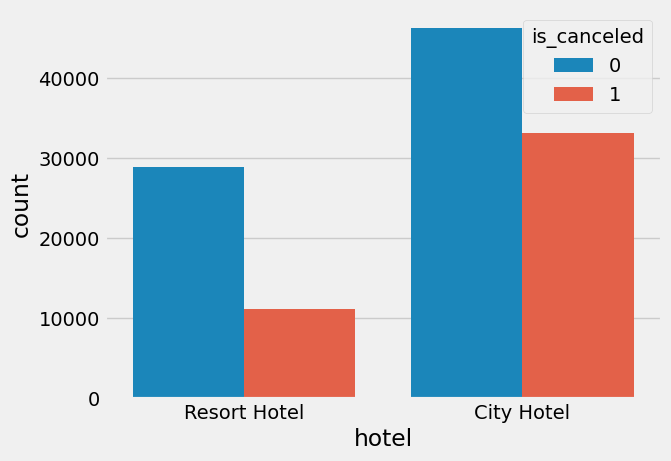

In [356]:
sns.countplot(data=data,x='hotel',hue='is_canceled')

<Axes: xlabel='is_canceled', ylabel='count'>

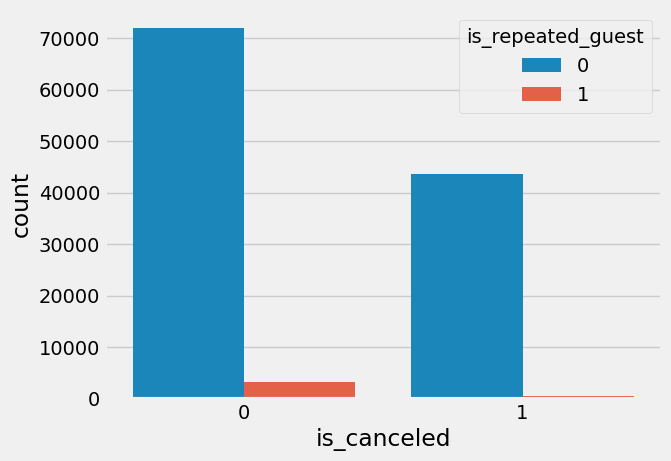

In [357]:
sns.countplot(data=data,x='is_canceled' , hue='is_repeated_guest')

In [358]:
data['is_canceled'].value_counts()

is_canceled
0    75166
1    44224
Name: count, dtype: int64

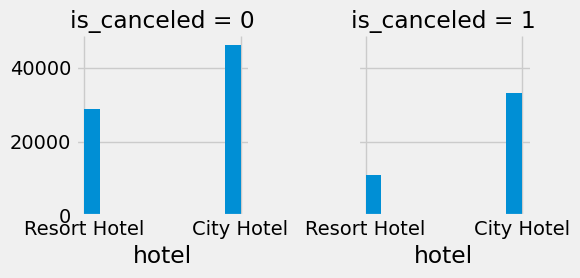

In [359]:
country=sns.FacetGrid(data,col='is_canceled')
country.map(plt.hist,'hotel')

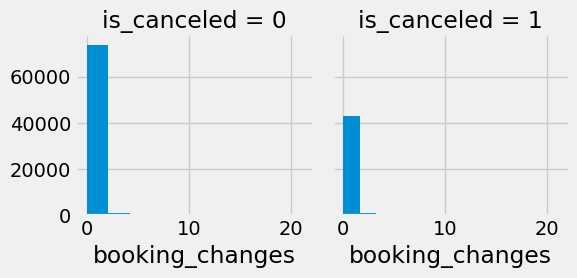

In [360]:
changes=sns.FacetGrid(data,col='is_canceled')
changes.map(plt.hist,'booking_changes')

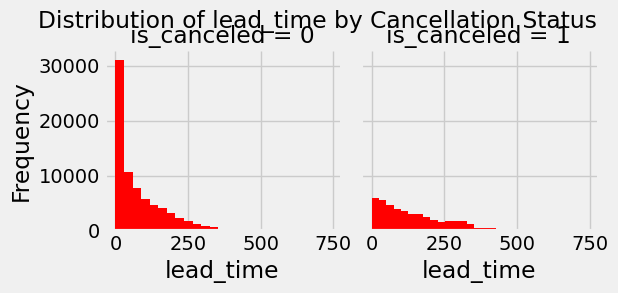

In [361]:
# Setup the FacetGrid to view histograms of 'lead_time' based on 'is_canceled' status
failed=sns.FacetGrid(data,col='is_canceled')
failed.map(plt.hist,"lead_time" , bins=25 ,color = 'r')
failed.set_axis_labels('lead_time', 'Frequency')
failed.fig.suptitle('Distribution of lead_time by Cancellation Status')
plt.show()

<ipython-input-394-0ede4ad74c22>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[data['is_canceled'] == 0]['lead_time'], label='Not Canceled', shade=True)
<ipython-input-394-0ede4ad74c22>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[data['is_canceled'] == 1]['lead_time'], label='Canceled', shade=True)


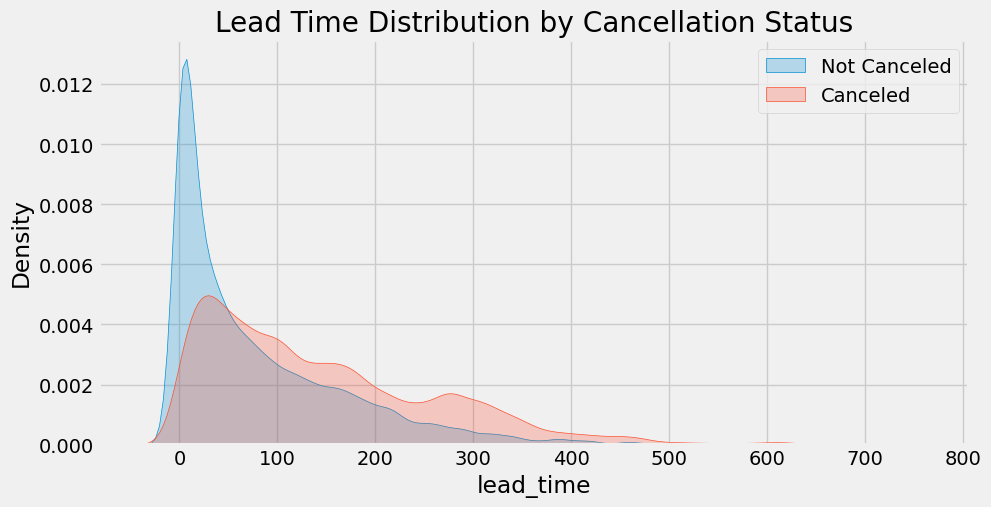

In [394]:
# "is_canceled "    with   "lead_time"
plt.figure(figsize=(10, 5))
sns.kdeplot(data=data[data['is_canceled'] == 0]['lead_time'], label='Not Canceled', shade=True)
sns.kdeplot(data=data[data['is_canceled'] == 1]['lead_time'], label='Canceled', shade=True)
plt.title('Lead Time Distribution by Cancellation Status')
plt.legend()
plt.show()


In [395]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


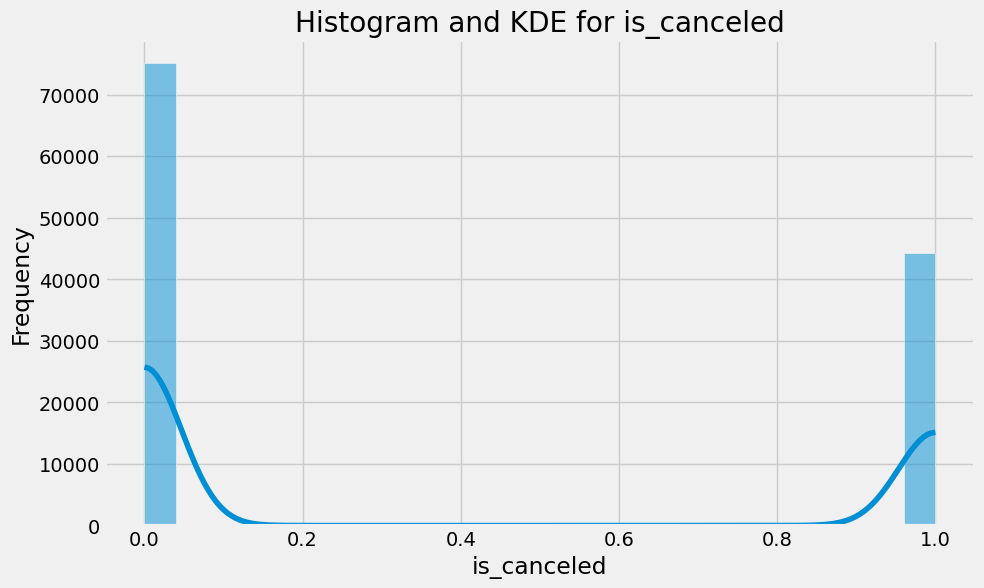

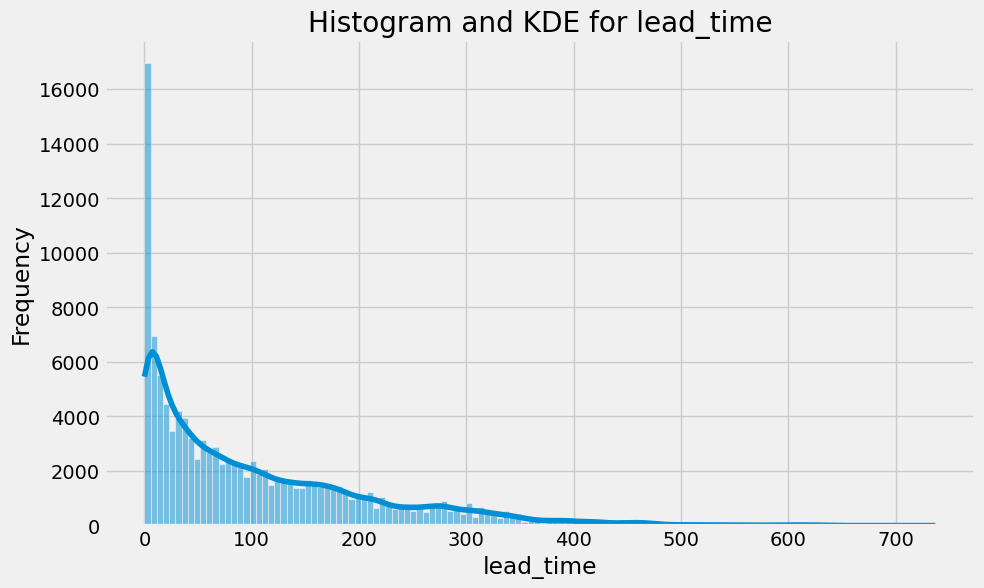

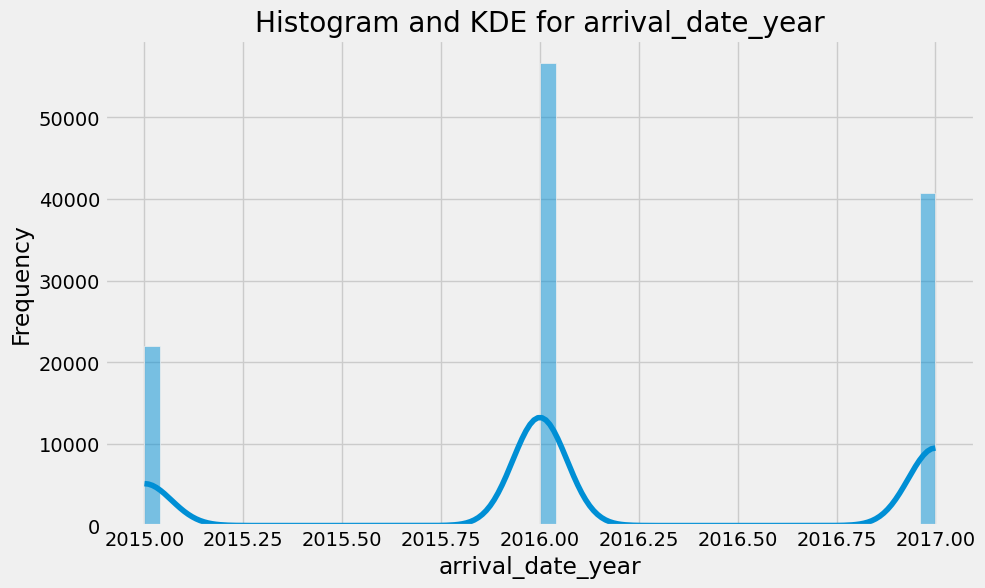

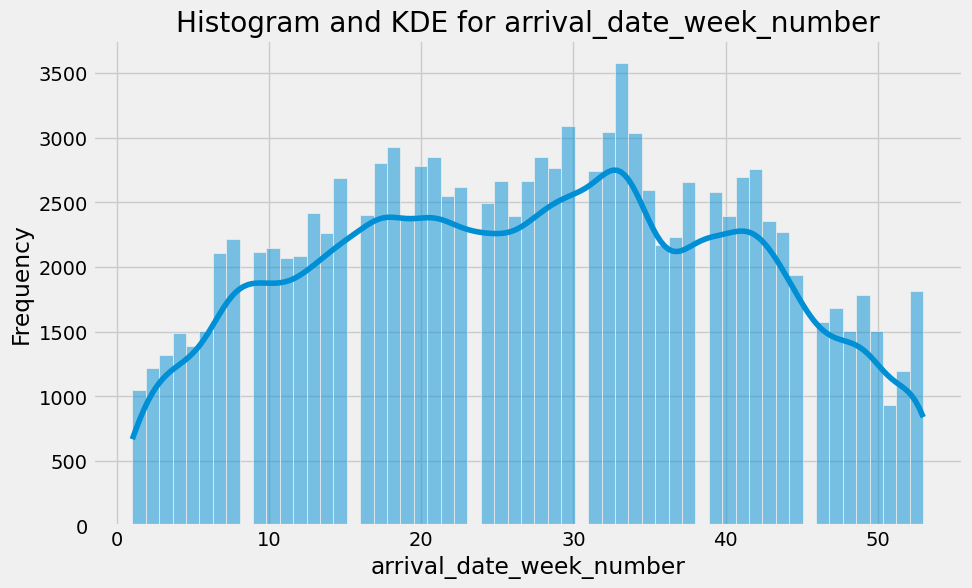

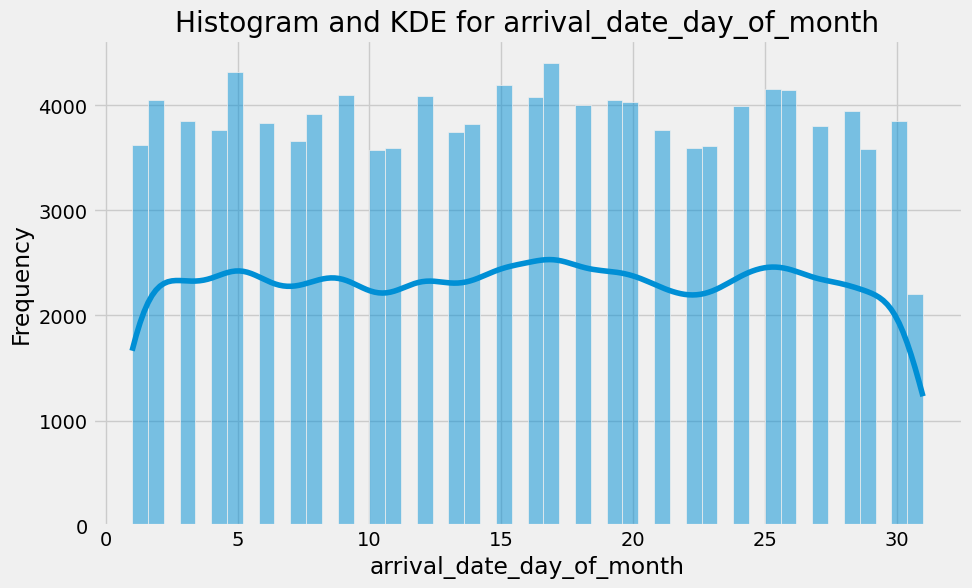

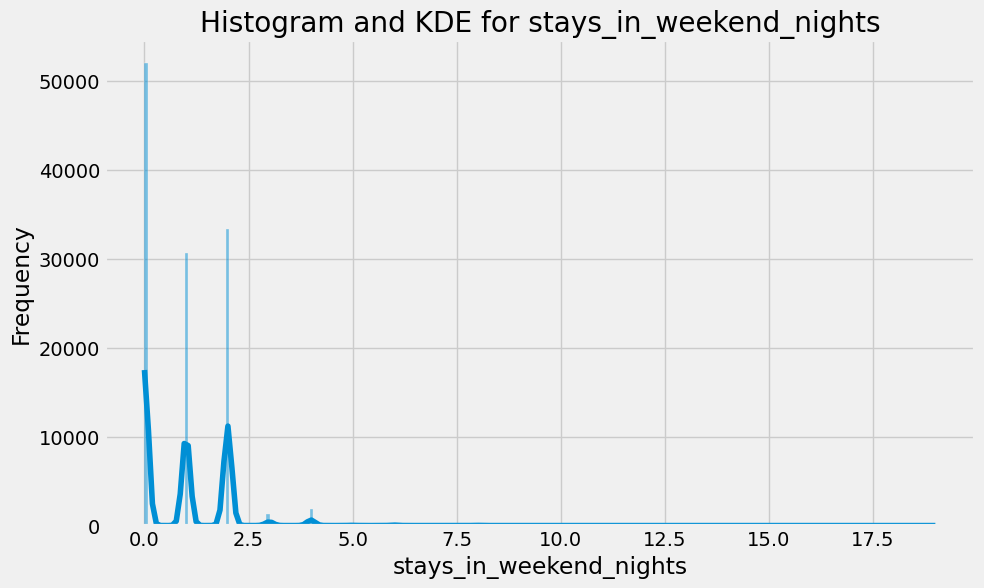

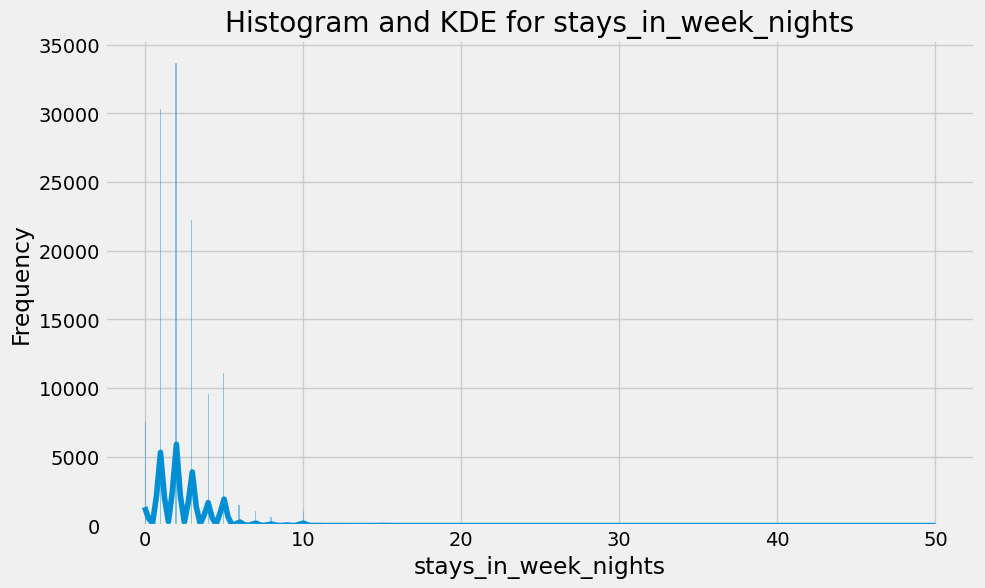

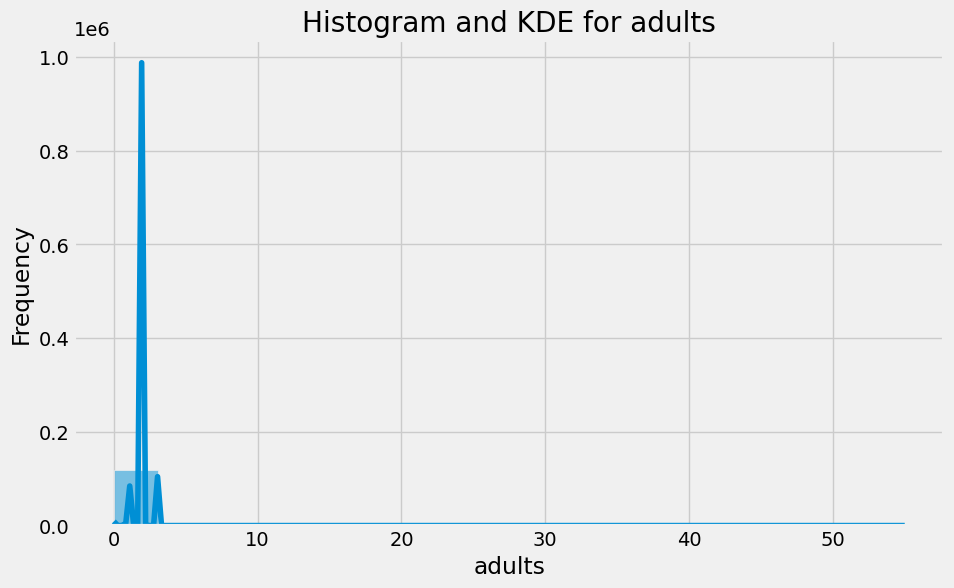

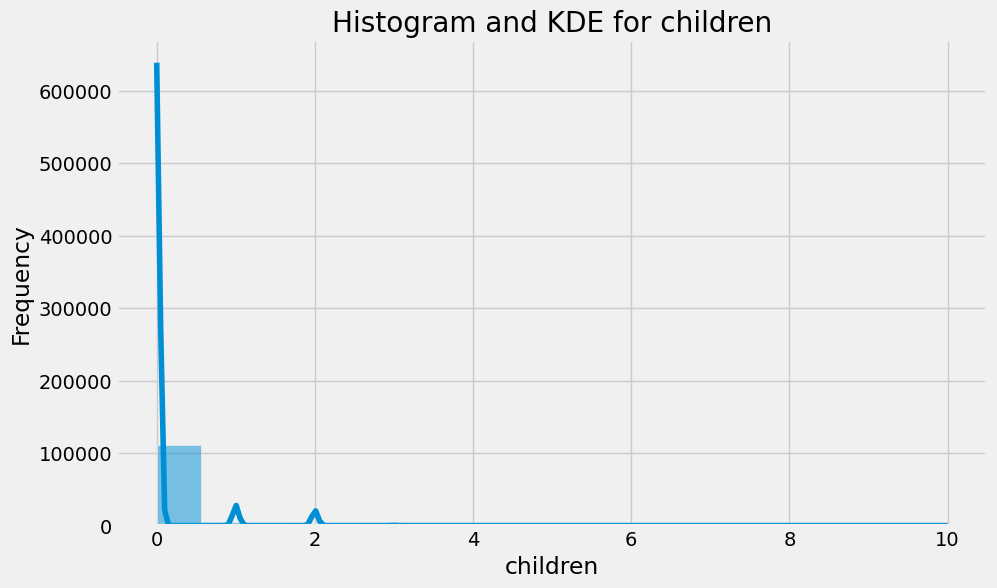

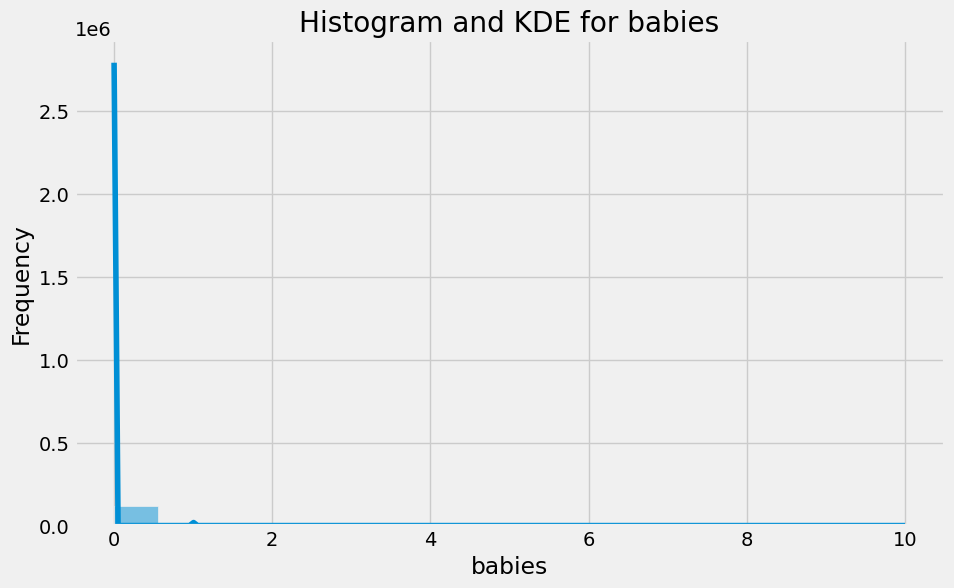

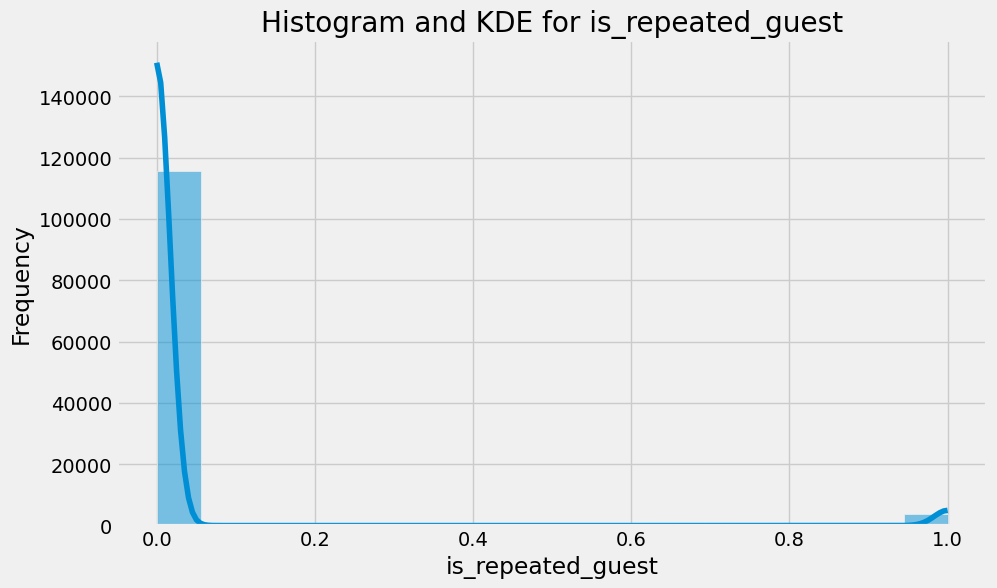

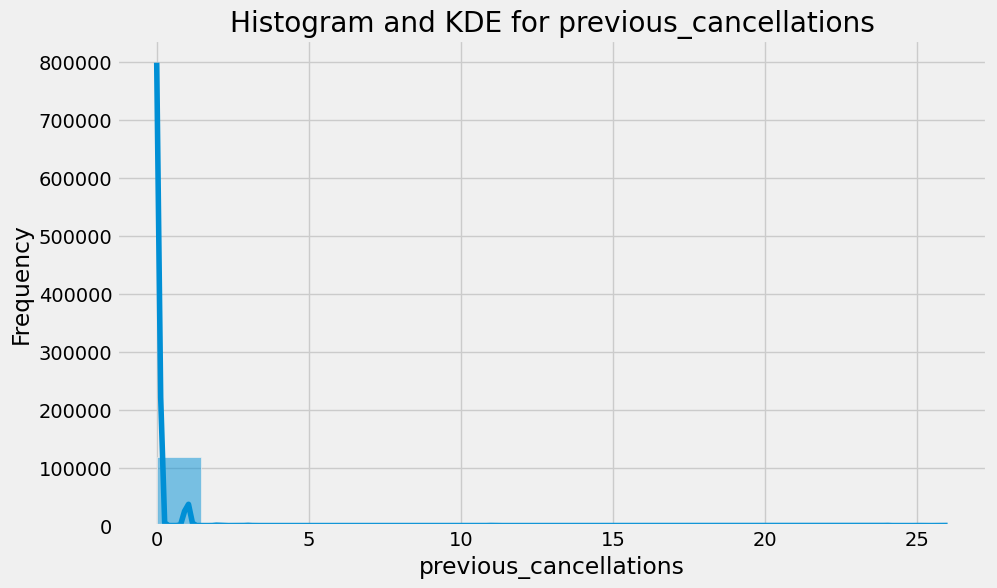

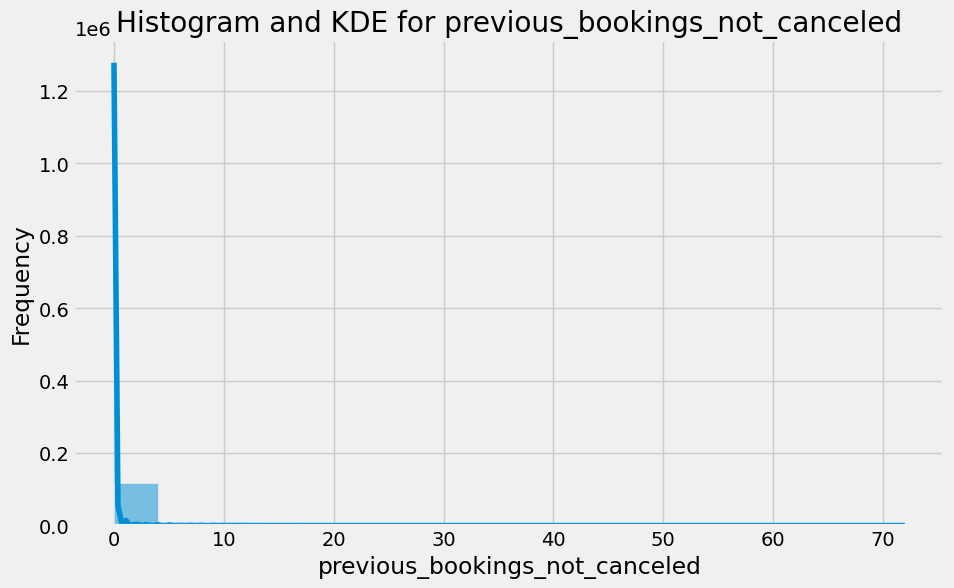

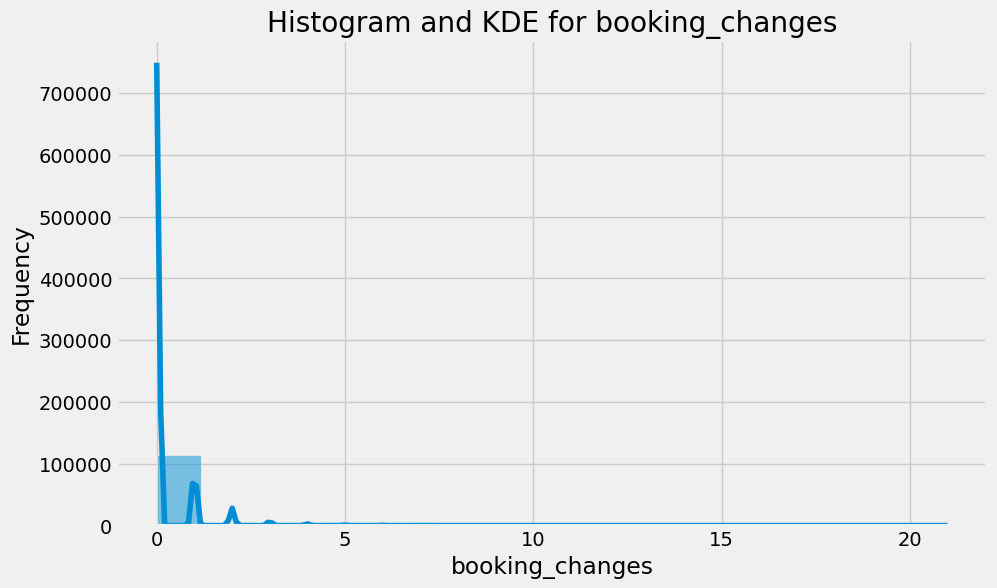

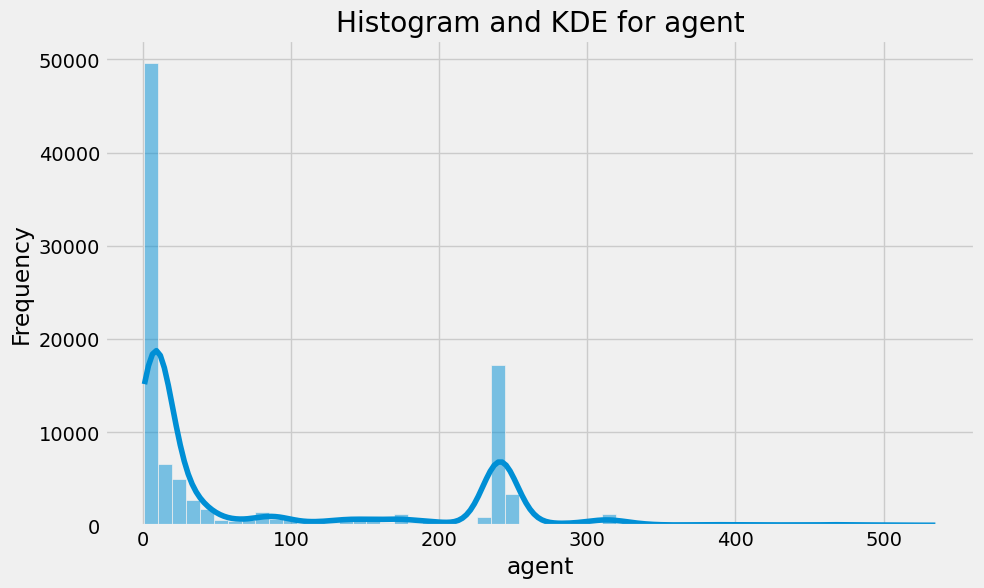

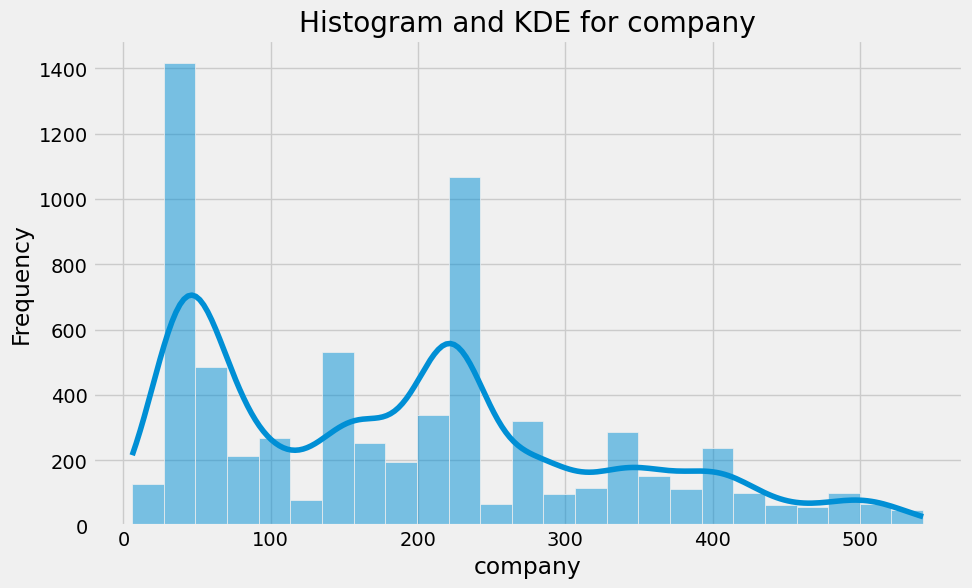

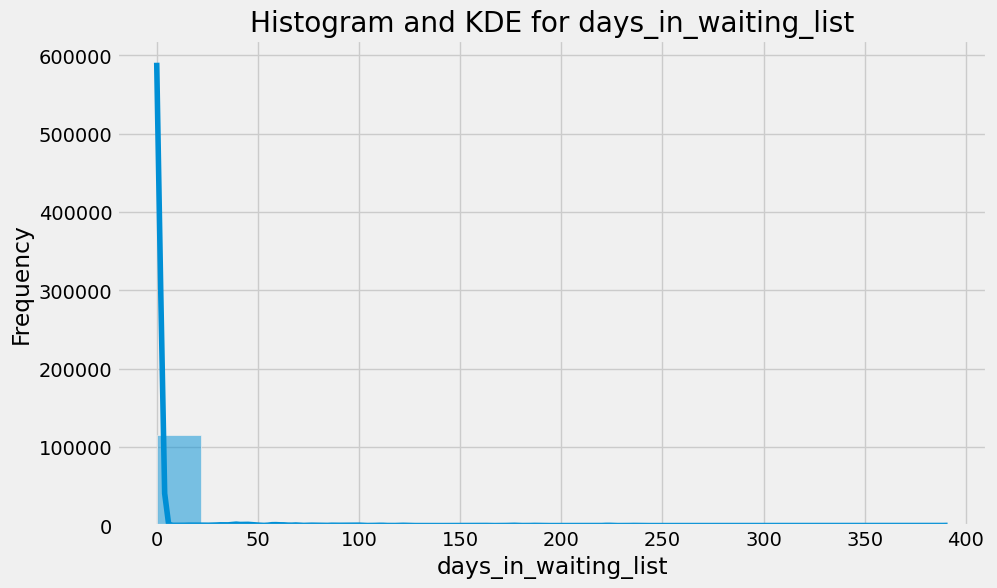

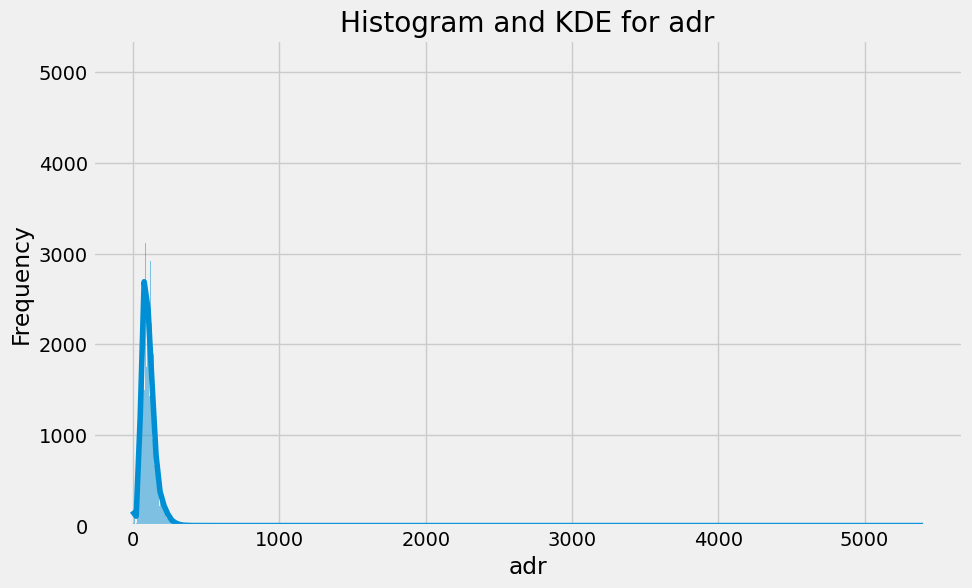

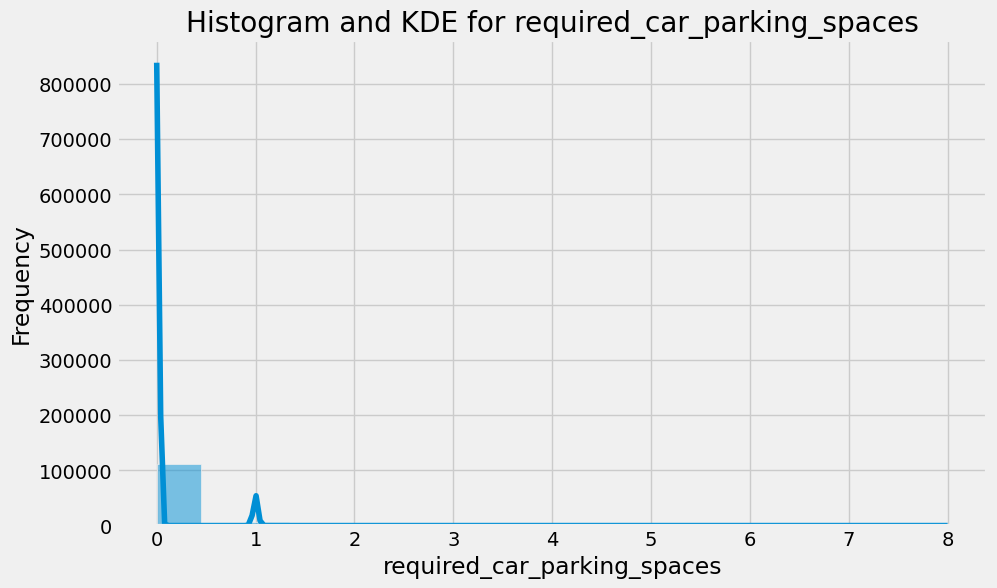

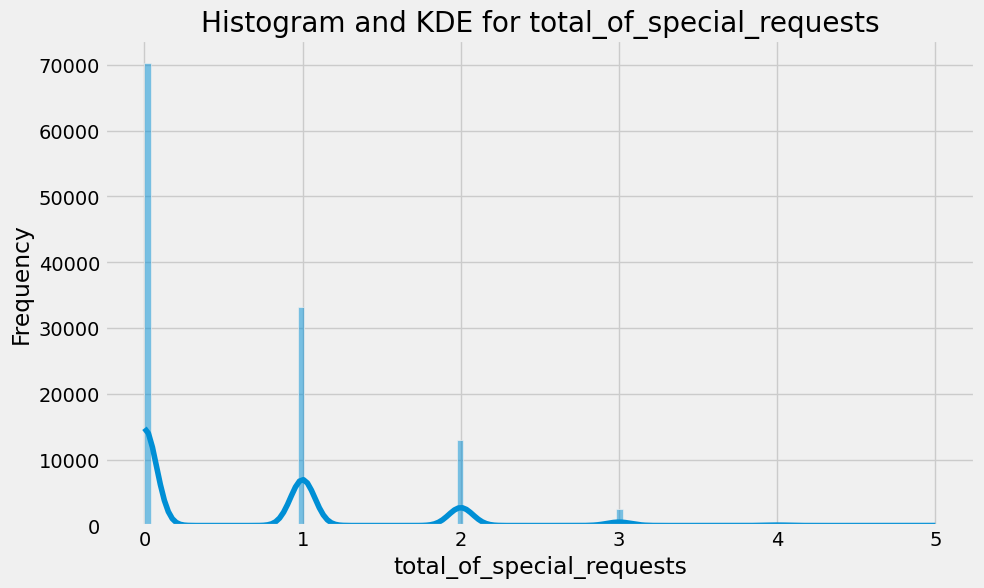

In [393]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_multivariate_distributions(data):
    numerical_cols = data.select_dtypes(include=['number']).columns
    # Plot histograms with KDE for numerical variables
    for col in numerical_cols:
        plt.figure(figsize=(10, 6))
        sns.histplot(data[col], kde=True)
        plt.title(f'Histogram and KDE for {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()
plot_multivariate_distributions(data)

In [ ]:
 # Plot count plots for categorical variables
def plot_multivariate_distributions(data):
    categorical_cols = data.select_dtypes(include=['object', 'category']).columns
    for col in categorical_cols:
      plt.figure(figsize=(10, 6))
      sns.countplot(data=data, x=col)
      plt.title(f'Count of {col}')
      plt.xlabel(col)
      plt.ylabel('Count')
      plt.show()
# Example usage:
plot_multivariate_distributions(data)

#3. Data Preparation

##a. Data Cleaning

*Identify Missing Data*: Check for missing values in each feature.

*Impute or Remove Missing Data*: Decide whether to impute missing values using strategies like mean, median, mode, or to remove rows/columns with missing data.

*Correct Data Types*: Ensure all features have the correct data types (e.g., integers, floats, categories).

*Handle Duplicates*: Check for and remove duplicate rows if any.

####checking for missing values

In [362]:
# is there missing values  on my data !!
data.isnull().values.any()

True

In [363]:
# percentage
null = pd.DataFrame({'Null Values' : data.isna().sum(), 'Percentage Null Values' : (data.isna().sum()) / (data.shape[0]) * (100)})
null

,Null Values,Percentage Null Values
hotel,0,0.000000
is_canceled,0,0.000000
lead_time,0,0.000000
arrival_date_year,0,0.000000
arrival_date_month,0,0.000000
arrival_date_week_number,0,0.000000
arrival_date_day_of_month,0,0.000000
stays_in_weekend_nights,0,0.000000
stays_in_week_nights,0,0.000000
adults,0,0.000000


### Handle missing values

In [364]:
# #the majority of bookings come from Portugal (PRT),filling them with the mode (most frequent value), which in this case is 'PRT'.
data['country'].fillna(data['country'].mode()[0], inplace=True)
# Handle missing values : filling with zero
data['children'].fillna(0, inplace=True)
data['agent'].fillna(0, inplace=True)
data['company'].fillna(0, inplace=True)

In [365]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


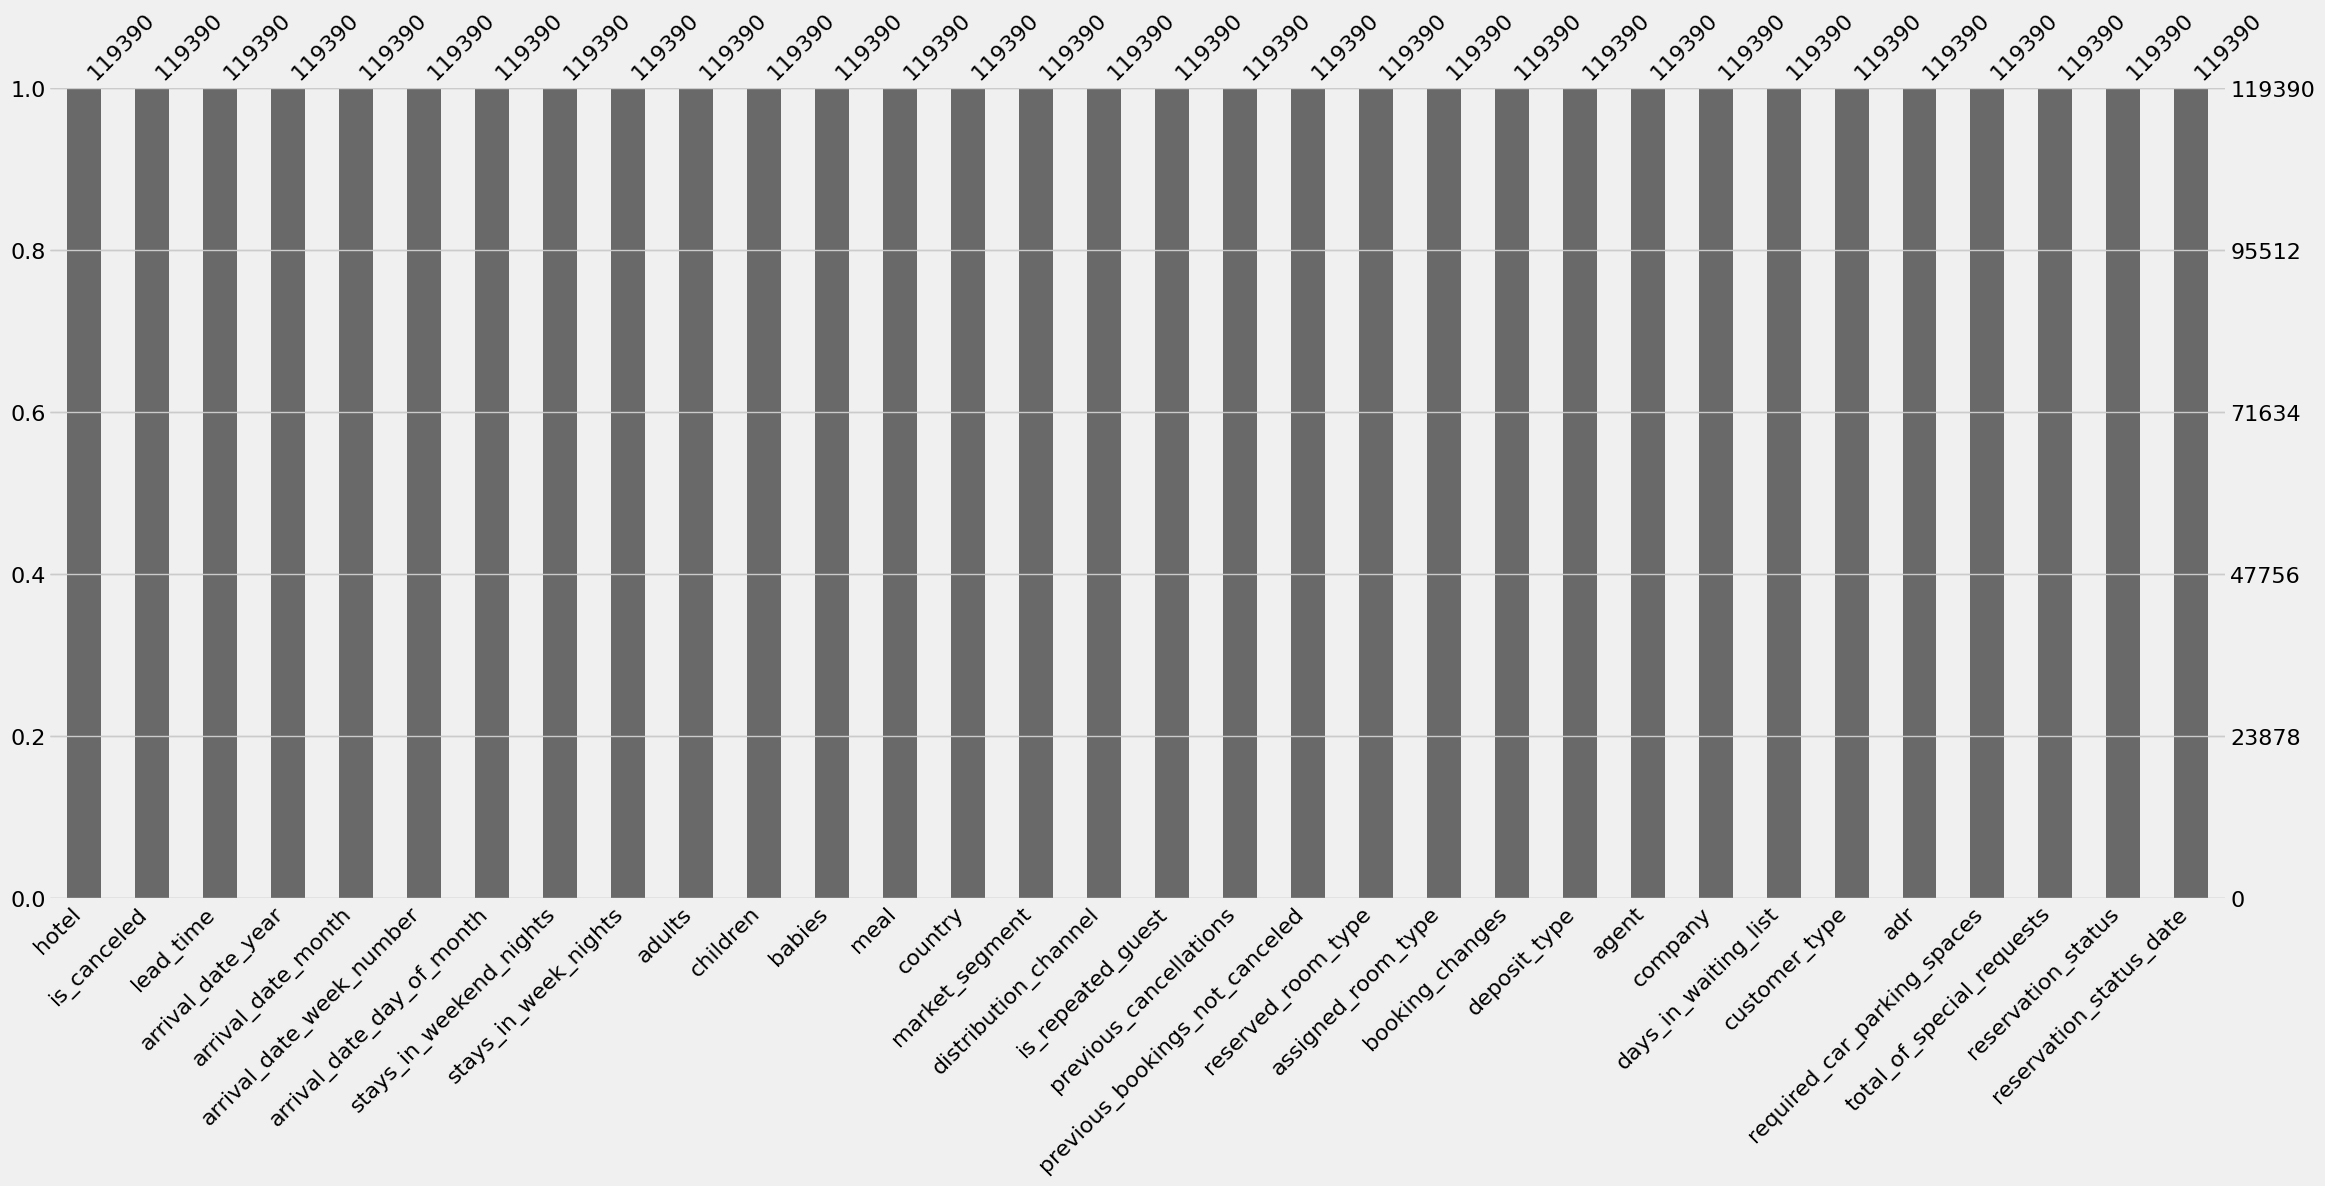

In [366]:
# visualizing null values
msno.bar(data)
plt.show()

In [367]:
categorical_features = data.select_dtypes(include=['object']).columns
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
print(f'Categorical variables: {categorical_features}')
print("="*100)
print(f'Numerical variables: {numerical_features}')

Categorical variables: Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')
Numerical variables: Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')


##b. Feature Engineering and Encoding
**Create New Features**: Derive new features if needed (e,g : total number of nights stayed)
**Feature Encoding**: Convert Categorical Variables: Convert categorical variables into numerical representations (e.g., one-hot encoding).

In [368]:
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'])

In [369]:
#separat date(day,month,year)
data['reservation_status_day'] = data['reservation_status_date'].dt.day
data['reservation_status_month'] = data['reservation_status_date'].dt.month
data['reservation_status_year'] = data['reservation_status_date'].dt.year

In [370]:
#meal countains values undefined which is equal to sc
data['meal'].replace("Undefined","SC",inplace =True)

In [371]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,reservation_status_day,reservation_status_month,reservation_status_year
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,...,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,1,7,2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,...,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,1,7,2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,...,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,2,7,2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,...,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,2,7,2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,...,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,3,7,2015


In [399]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


#Model building

In [375]:
y = data['is_canceled'].values.reshape(-1, 1)

numerical_variables= data[['total_of_special_requests',
                  'required_car_parking_spaces','booking_changes','previous_bookings_not_canceled',
                  'previous_cancellations','lead_time','adr']].values

In [377]:
encoder = OneHotEncoder()
one_hot_encoded = encoder.fit_transform(
    data[[ 'hotel','country', 'market_segment','is_repeated_guest']])
X_norminal = one_hot_encoded.toarray()

encoder = OrdinalEncoder()
ordinal_encoded = encoder.fit_transform(data[['customer_type', 'assigned_room_type','deposit_type']])
X_ord = ordinal_encoded

In [378]:
X = np.hstack((numerical_variables ,X_ord ,X_norminal))
X.shape

(119390, 199)

In [379]:
scalar= MinMaxScaler()
X= scalar.fit_transform(X)
y=scalar.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2024)

In [382]:
# X = scalar.fit_transform(x)
# # X= scalar.fit_transform(target)
# Y=scalar.fit_transform(y)

In [383]:
# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [384]:
# Initialize the ANN
model = Sequential()

In [304]:
model.add(Dense(10,activation= "relu",input_shape=(X_train.shape[1],)))
model.add(Dense(10,activation= "relu"))
model.add(Dense(10,activation= "relu"))
model.add(Dense(10,activation= "relu"))
model.add(Dense(10,activation= "relu"))
model.add(Dense(10,activation= "relu"))
model.add(Dense(10,activation= "relu"))
model.add(Dense(10,activation= "relu"))
model.add(Dense(1,activation= "sigmoid"))
model.compile(optimizer= "adam",loss="binary_crossentropy", metrics=['accuracy'])
model.summary()

history= model.fit(X_train,y_train,epochs=20,validation_split=0.2)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                2000      
                                                                 
 dense_13 (Dense)            (None, 10)                110       
                                                                 
 dense_14 (Dense)            (None, 10)                110       
                                                                 
 dense_15 (Dense)            (None, 10)                110       
                                                                 
 dense_16 (Dense)            (None, 10)                110       
                                                                 
 dense_17 (Dense)            (None, 10)                110       
                                                                 
 dense_18 (Dense)            (None, 10)               

In [305]:
# Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

1120/1120 [==============================] - 3s 3ms/step - loss: 0.3486 - accuracy: 0.8291
Test Loss: 0.3486248254776001, Test Accuracy: 0.8291314244270325


In [306]:
# Make Predictions
predictions = model.predict(X_test)

1120/1120 [==============================] - 2s 2ms/step


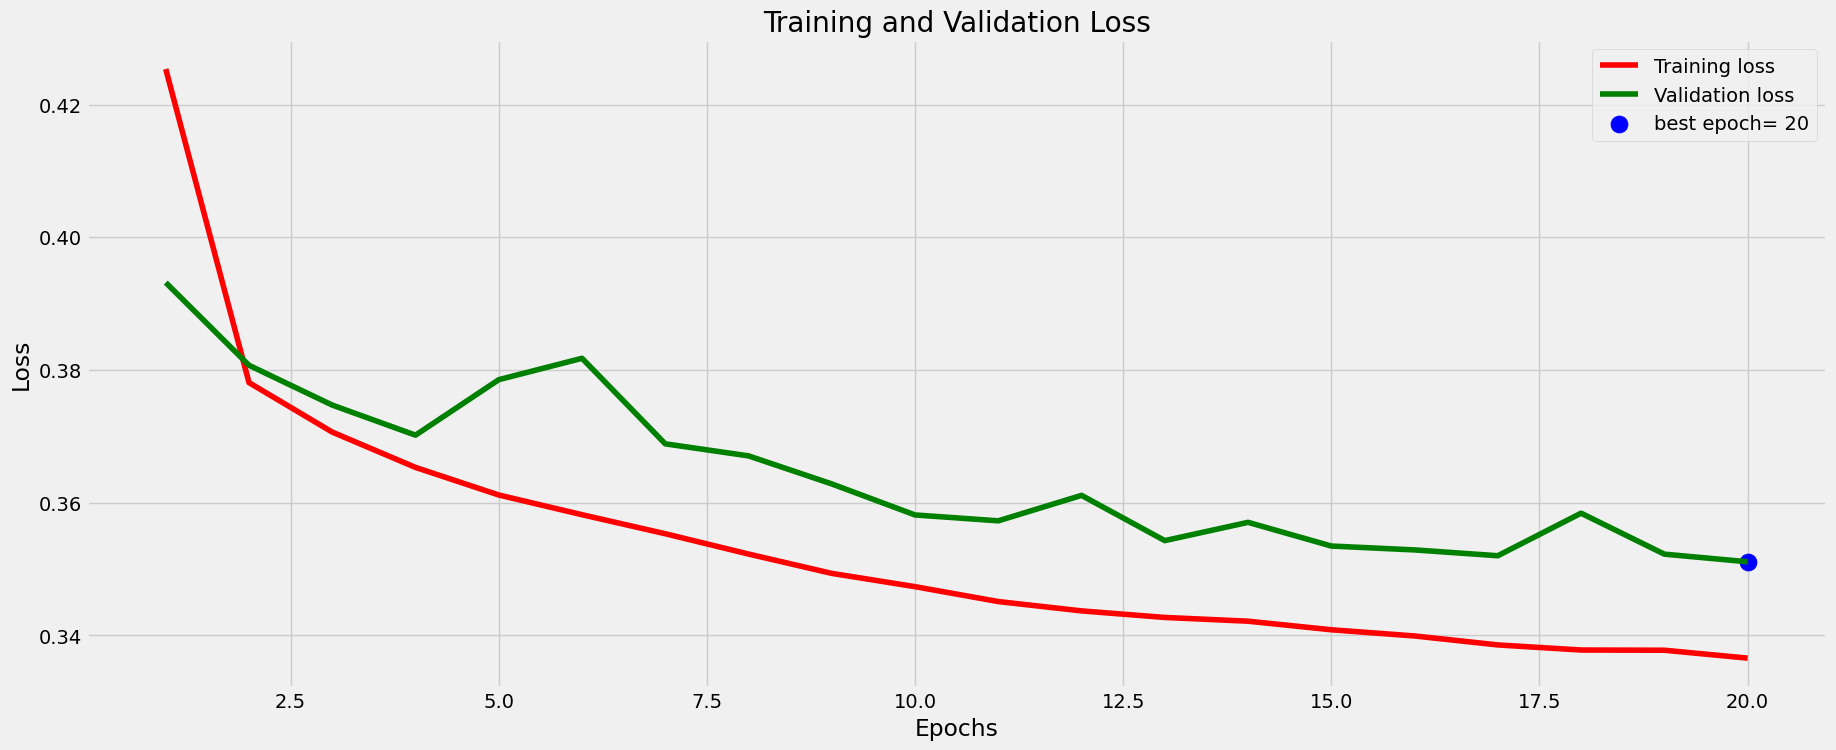

In [307]:
tr_loss = history.history['loss']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

Epochs = [i+1 for i in range(len(tr_loss))]
loss_label = f'best epoch= {str(index_loss + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout
plt.show()

In [308]:
y_pred=model.predict(X_test)
y_pred=(y_pred>0.5)

1120/1120 [==============================] - 2s 2ms/step


In [309]:
from sklearn.metrics import classification_report, confusion_matrix

In [310]:
from sklearn.metrics import r2_score,accuracy_score
R2 = r2_score(y_test, y_pred)
print("R2 Score=",R2 )
# 30%

R2 Score= 0.2704733820147597


In [385]:
Accurcy = accuracy_score(y_test, y_pred)
print("Accurcy=",Accurcy )

Accurcy= 0.8291314180417121


In [312]:
conf_matrix=confusion_matrix(y_test,y_pred)
conf_matrix

array([[20762,  1646],
       [ 4474,  8935]])

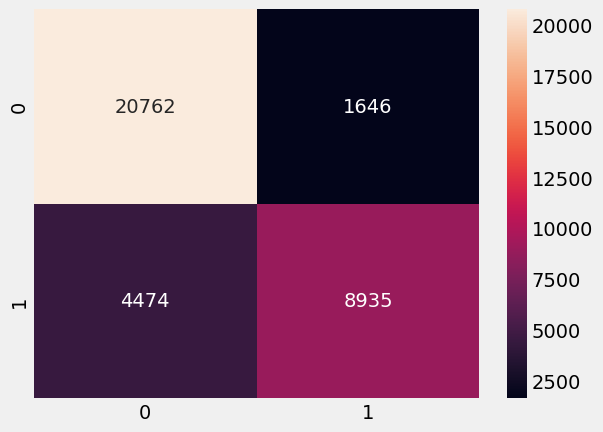

In [313]:
sns.heatmap(conf_matrix,annot=True, fmt='d')
plt.show()

In [314]:
# Define a function to plot the confusion matrix as a heatmap
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2 , v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    plt.subplots(figsize = (5,3))
    ax = sns.heatmap(cm/np.sum(cm), annot=labels, fmt="", cmap='Blues')
    ax.set_xlabel('Predicted Class')
    ax.set_ylabel('Actual Class')
    ax.set_title(f'ANN')
    plt.show()

Classification report:
              precision    recall  f1-score   support

         0.0       0.82      0.93      0.87     22408
         1.0       0.84      0.67      0.74     13409

    accuracy                           0.83     35817
   macro avg       0.83      0.80      0.81     35817
weighted avg       0.83      0.83      0.82     35817


____________



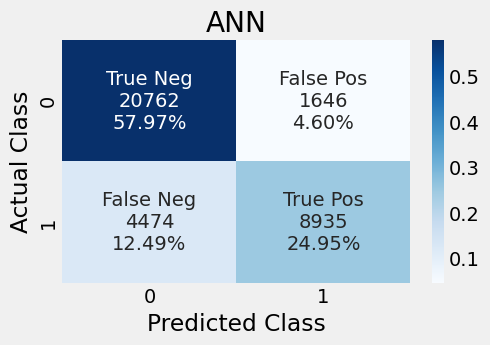

In [315]:
print(f"Classification report:\n{classification_report(y_test, y_pred)}")
print("")
print("_"*12)
print("")

# Plot the confusion matrix as a heatmap
plot_confusion_matrix(y_test, y_pred)